In [1]:
!date

Sun Feb 23 14:17:30 PST 2020


# Level 1 Plotting

In [2]:
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import scanpy as scanp
from scipy.stats import ks_2samp, ttest_ind
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [3]:
isoform = anndata.read_h5ad("cell_ranger_annotation/isoform.h5ad")
gene =    anndata.read_h5ad("cell_ranger_annotation/gene.h5ad")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [332]:
gene.obs.subclass_label.value_counts()

L5 IT          1560
L6 CT           904
L6b             568
Vip             555
Pvalb           496
L2/3 IT         482
L6 IT           395
Sst             391
Lamp5           348
L5/6 NP         207
Sncg             71
SMC              17
Low Quality      12
L5 ET            12
Endo              7
Astro             7
VLMC              6
L6 IT Car3        5
Name: subclass_label, dtype: int64

In [ ]:
cmap

# Plot intro

In [347]:
unique

array(['Astro', 'Endo', 'L2/3 IT', 'L5 ET', 'L5 IT', 'L5/6 NP', 'L6 CT',
       'L6 IT', 'L6 IT Car3', 'L6b', 'Lamp5', 'Low Quality', 'Pvalb',
       'SMC', 'Sncg', 'Sst', 'VLMC', 'Vip'], dtype=object)

In [642]:
gene.obs.groupby("class_label")["subclass_label"].apply(np.unique)

class_label
GABAergic                           [Lamp5, Pvalb, Sncg, Sst, Vip]
Glutamatergic    [L2/3 IT, L5 ET, L5 IT, L5/6 NP, L6 CT, L6 IT,...
Low Quality                                          [Low Quality]
Non-Neuronal                              [Astro, Endo, SMC, VLMC]
Name: subclass_label, dtype: object

In [ ]:
(0.38823529411764707, 0.4745098039215686,  0.2235294117647059 ),  # 637939
(0.5490196078431373,  0.6352941176470588,  0.3215686274509804 ),  # 8ca252
(0.7098039215686275,  0.8117647058823529,  0.4196078431372549 ),  # b5cf6b
(0.807843137254902,   0.8588235294117647,  0.611764705882353  ),  # cedb9c

In [644]:
cluster_cmap = {
"Astro": (0.38823529411764707, 0.4745098039215686,  0.2235294117647059 ),  # 637939,
"Endo" : (0.5490196078431373,  0.6352941176470588,  0.3215686274509804 ),  # 8ca252,
"SMC"  : (0.7098039215686275,  0.8117647058823529,  0.4196078431372549 ),  # b5cf6b,
"VLMC" : (0.807843137254902,   0.8588235294117647,  0.611764705882353  ),  # cedb9c,
"Low Quality" : (0,0,0),
#"Astro" : (0.9019607843137255,  0.3333333333333333,  0.050980392156862744),  # e6550d #reds
#"Endo" : (0.9921568627450981,  0.5529411764705883,  0.23529411764705882 ),  # fd8d3c
"L2/3 IT" : (0.9921568627450981,  0.6823529411764706,  0.4196078431372549  ),  # fdae6b
"L5 ET" : (0.9921568627450981,  0.8156862745098039,  0.6352941176470588  ),  # fdd0a2
"L5 IT" : (0.5176470588235295,  0.23529411764705882, 0.2235294117647059 ),  # 843c39
"L5/6 NP" : (0.6784313725490196,  0.28627450980392155, 0.2901960784313726 ),  # ad494a
"L6 CT" : (0.8392156862745098,  0.3803921568627451,  0.4196078431372549 ),  # d6616b
"L6 IT" : (0.9058823529411765,  0.5882352941176471,  0.611764705882353  ),  # e7969c
"L6 IT Car3" : (1.0,                 0.4980392156862745,  0.054901960784313725),  # ff7f0e
"L6b" : (1.0,                 0.7333333333333333,  0.47058823529411764 ),  # ffbb78
#"Low Quality" : (0.5490196078431373,  0.42745098039215684, 0.19215686274509805),  # 8c6d31
#"SMC" : (0.7411764705882353,  0.6196078431372549,  0.2235294117647059 ),  # bd9e39
#"VLMC" : (0.9058823529411765,  0.7294117647058823,  0.3215686274509804 ),  # e7ba52
# (0.9058823529411765,  0.796078431372549,   0.5803921568627451 ),  # e7cb94
"Lamp5" : (0.19215686274509805, 0.5098039215686274,  0.7411764705882353  ),  # 3182bd # blues
"Sncg" : (0.4196078431372549,  0.6823529411764706,  0.8392156862745098  ),  # 6baed6
"Vip" : (0.6196078431372549,  0.792156862745098,   0.8823529411764706  ),  # 9ecae1
"Sst" : (0.7764705882352941,  0.8588235294117647,  0.9372549019607843  ),  # c6dbef
#"Pvalb" : (0.4588235294117647,  0.4196078431372549,  0.6941176470588235  ),  # 756bb1
#(0.6196078431372549,  0.6039215686274509,  0.7843137254901961  ),  # 9e9ac8
"Pvalb":(0.7372549019607844,  0.7411764705882353,  0.8627450980392157  ),  # bcbddc
#"Pvalb":(0.8549019607843137,  0.8549019607843137,  0.9215686274509803  ),  # dadaeb
}

In [545]:
cluster_order = [
    "Lamp5",
    "Sncg",
    "Vip",
    "Sst",
    "Pvalb",
    "L5 IT",
    "L5/6 NP",
    "L5 ET",
    "L2/3 IT",
    "L6b",
    "VLMC",
    "L6 IT",
    "L6 CT",
    "L6 IT Car3",
    "Endo",
    "Astro",
    "SMC",
    "Low Quality"
]

# the things that are not gabaergic or glutamatergic, color them differently
# SMC other
# Astro
# Edo
# Make these different shades of green

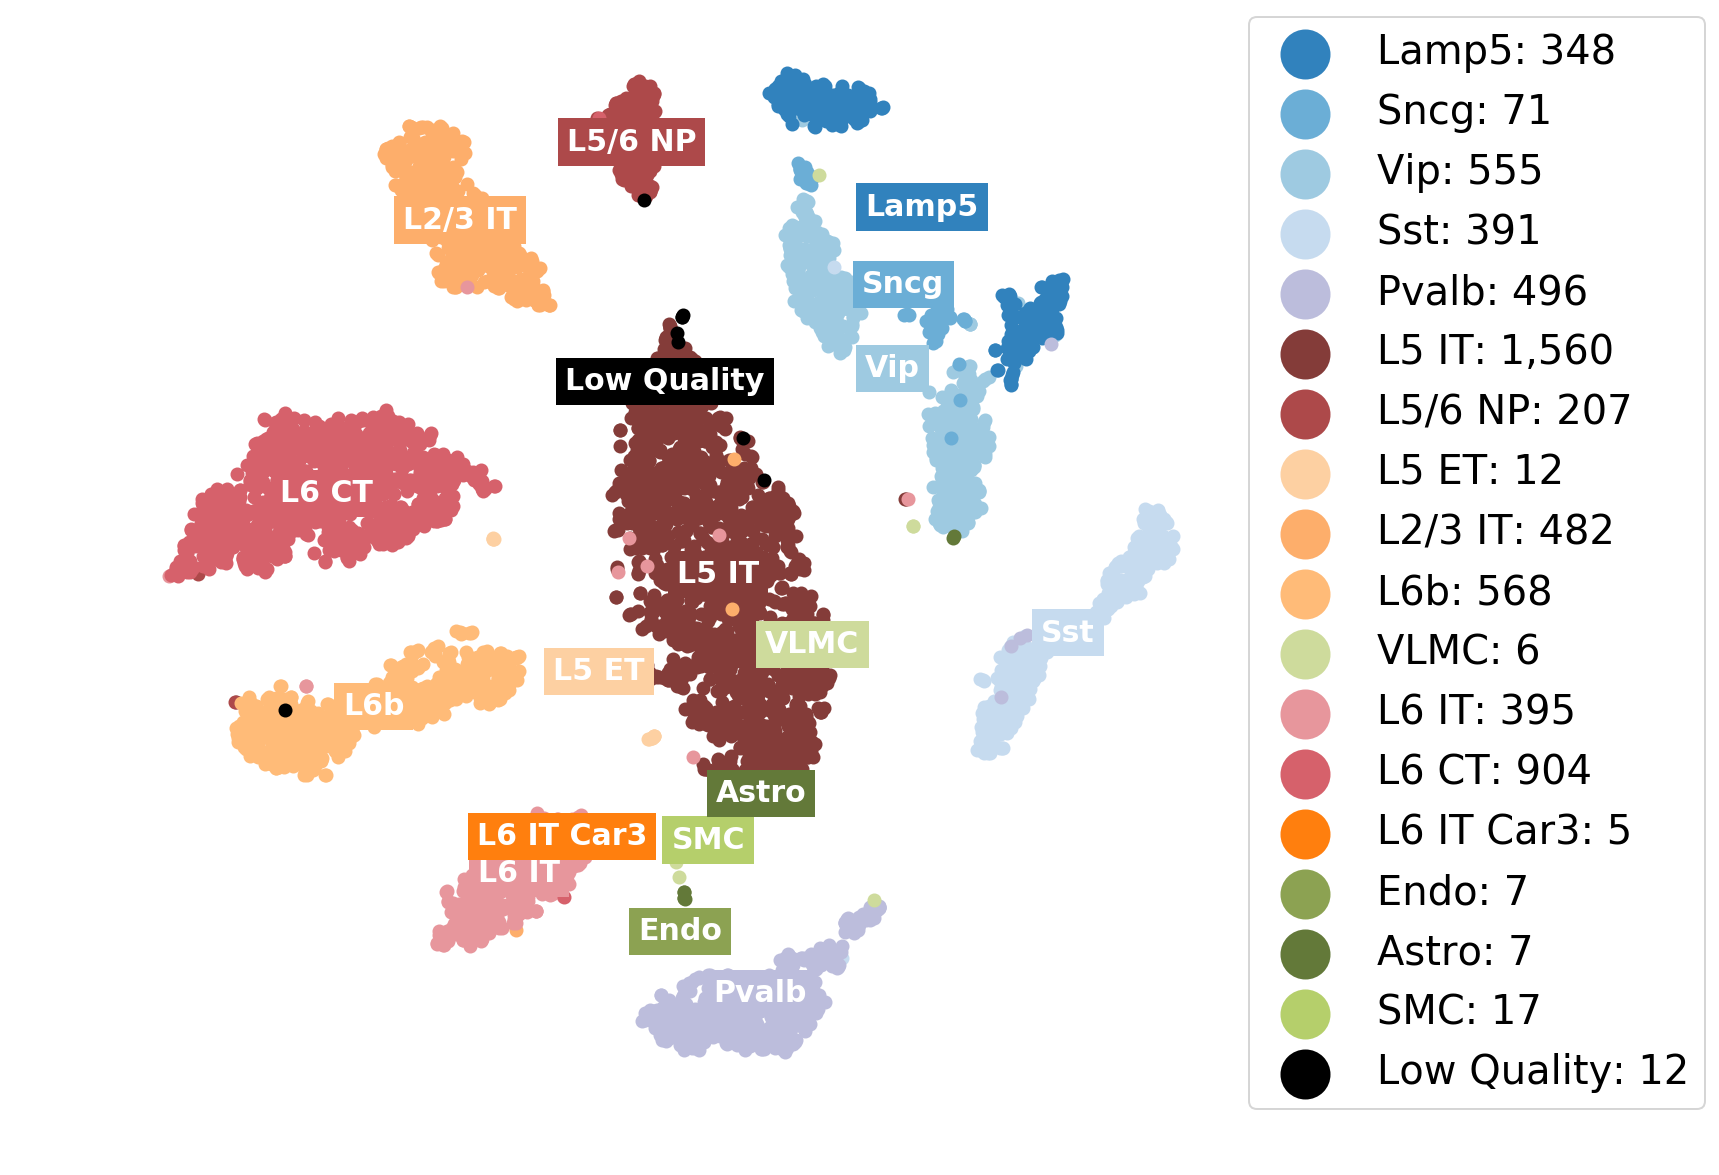

In [645]:
fig, ax = plt.subplots(figsize=(10,10))

c = gene.obs["subclass_label"].unique().astype(str)
cmap = cm.get_cmap("tab20b")

for idx, cluster in enumerate(c):
    XX = gene[gene.obs.subclass_label == cluster,:].obsm["X_nca_tsne"]
    
    x = XX[:,0]
    y = XX[:,1]
    color = cluster_cmap[cluster]#cmap(idx)
    if cluster == "Endo": y = y-10
    if cluster == "SMC": y = y+5; x=x+5
    ax.scatter(x, y, color = color, label=cluster+": {:,}".format(x.shape[0]))
    ax.annotate(cluster, 
             (np.mean(x), np.mean(y)),
             horizontalalignment='center',
             verticalalignment='center',
             size=15, weight='bold',
             color="white",
               backgroundcolor=color) 
    
handles, labels = ax.get_legend_handles_labels()
idx = [np.where(c==i)[0][0] for i in cluster_order]
handles = np.array(handles)[idx]
labels=np.array(labels)[idx]

ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), markerscale=4)
ax.set_axis_off()
plt.show()

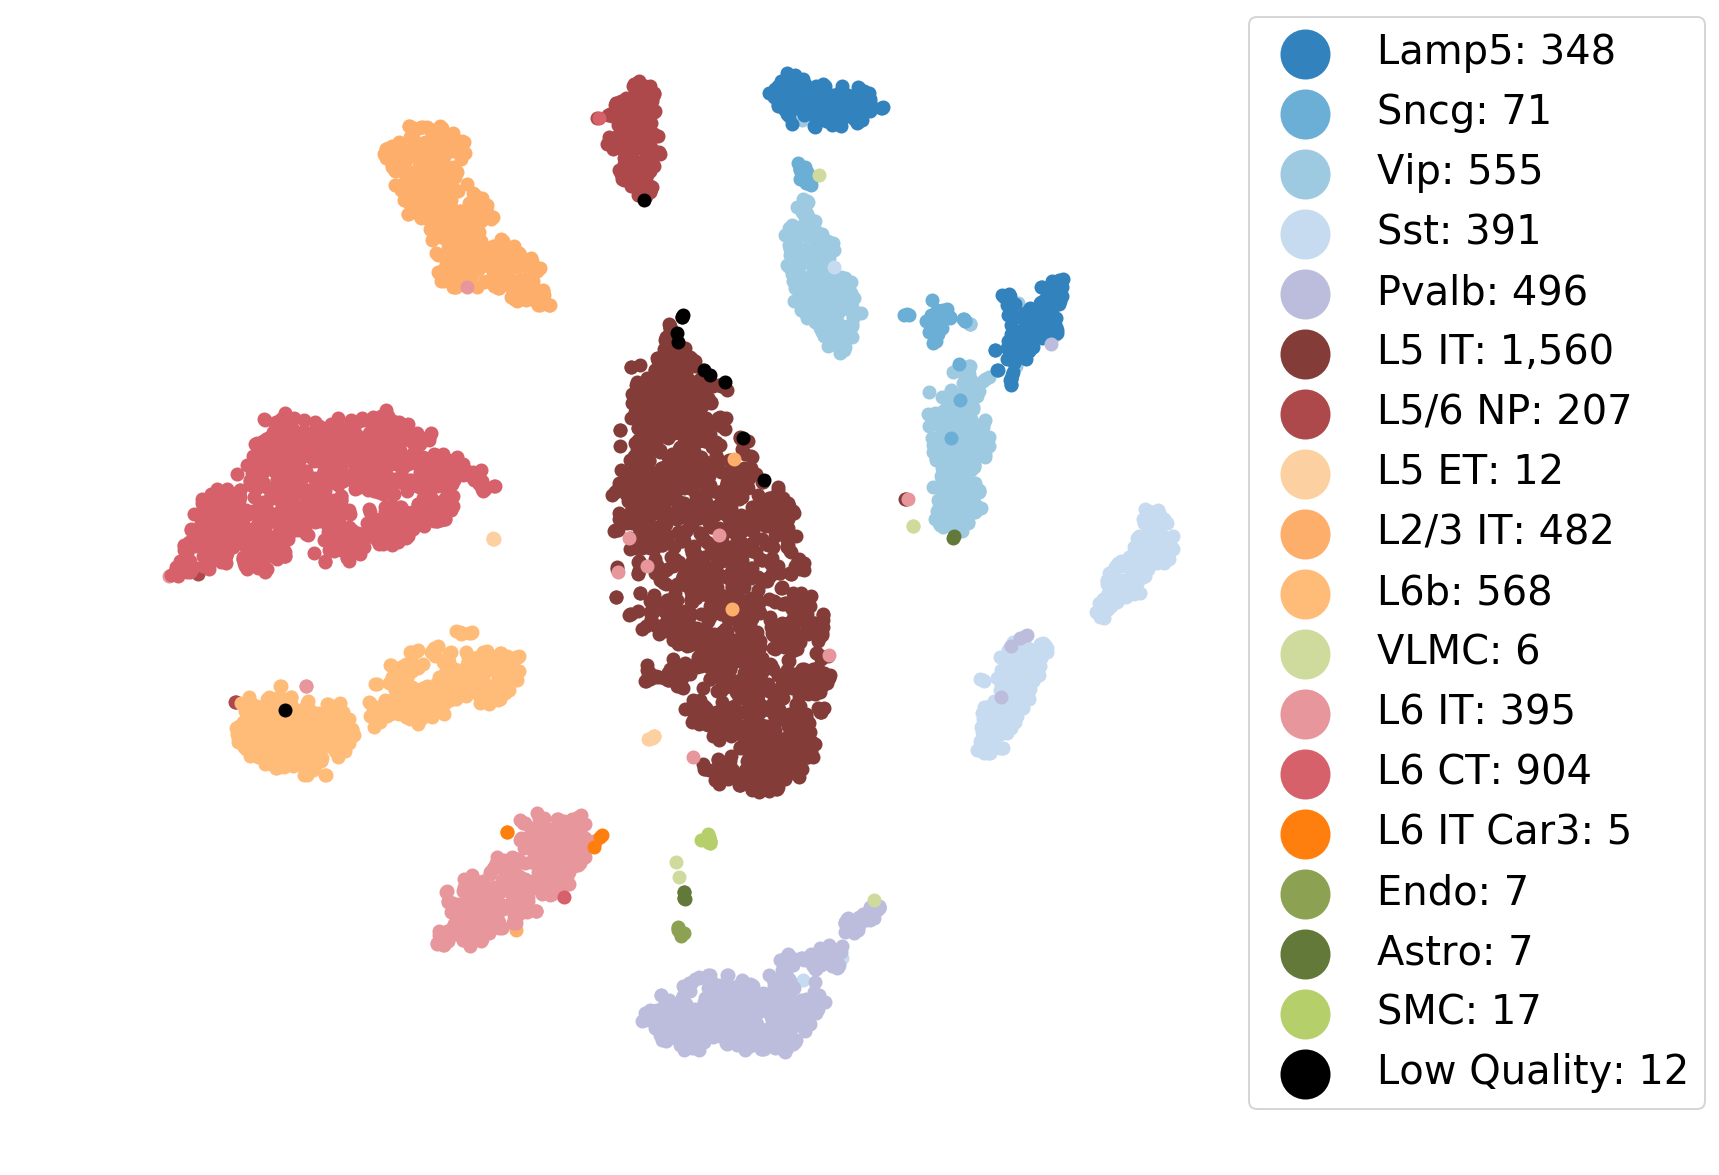

In [646]:
fig, ax = plt.subplots(figsize=(10,10))

c = gene.obs["subclass_label"].unique().astype(str)
cmap = cm.get_cmap("tab20")

for idx, cluster in enumerate(c):
    XX = gene[gene.obs.subclass_label == cluster,:].obsm["X_nca_tsne"]
    
    x = XX[:,0]
    y = XX[:,1]
    if cluster == "Endo": y = y-10
    if cluster == "SMC": y = y+5; x=x+5
    ax.scatter(x, y, color = cluster_cmap[cluster], label=cluster+": {:,}".format(x.shape[0]))
    

handles, labels = ax.get_legend_handles_labels()
idx = [np.where(c==i)[0][0] for i in cluster_order]
handles = np.array(handles)[idx]
labels=np.array(labels)[idx]

ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), markerscale=4)
ax.set_axis_off()

plt.savefig("./level_1_fig/subclass_nca.png", bbox_inches='tight', dpi=300)
plt.show()

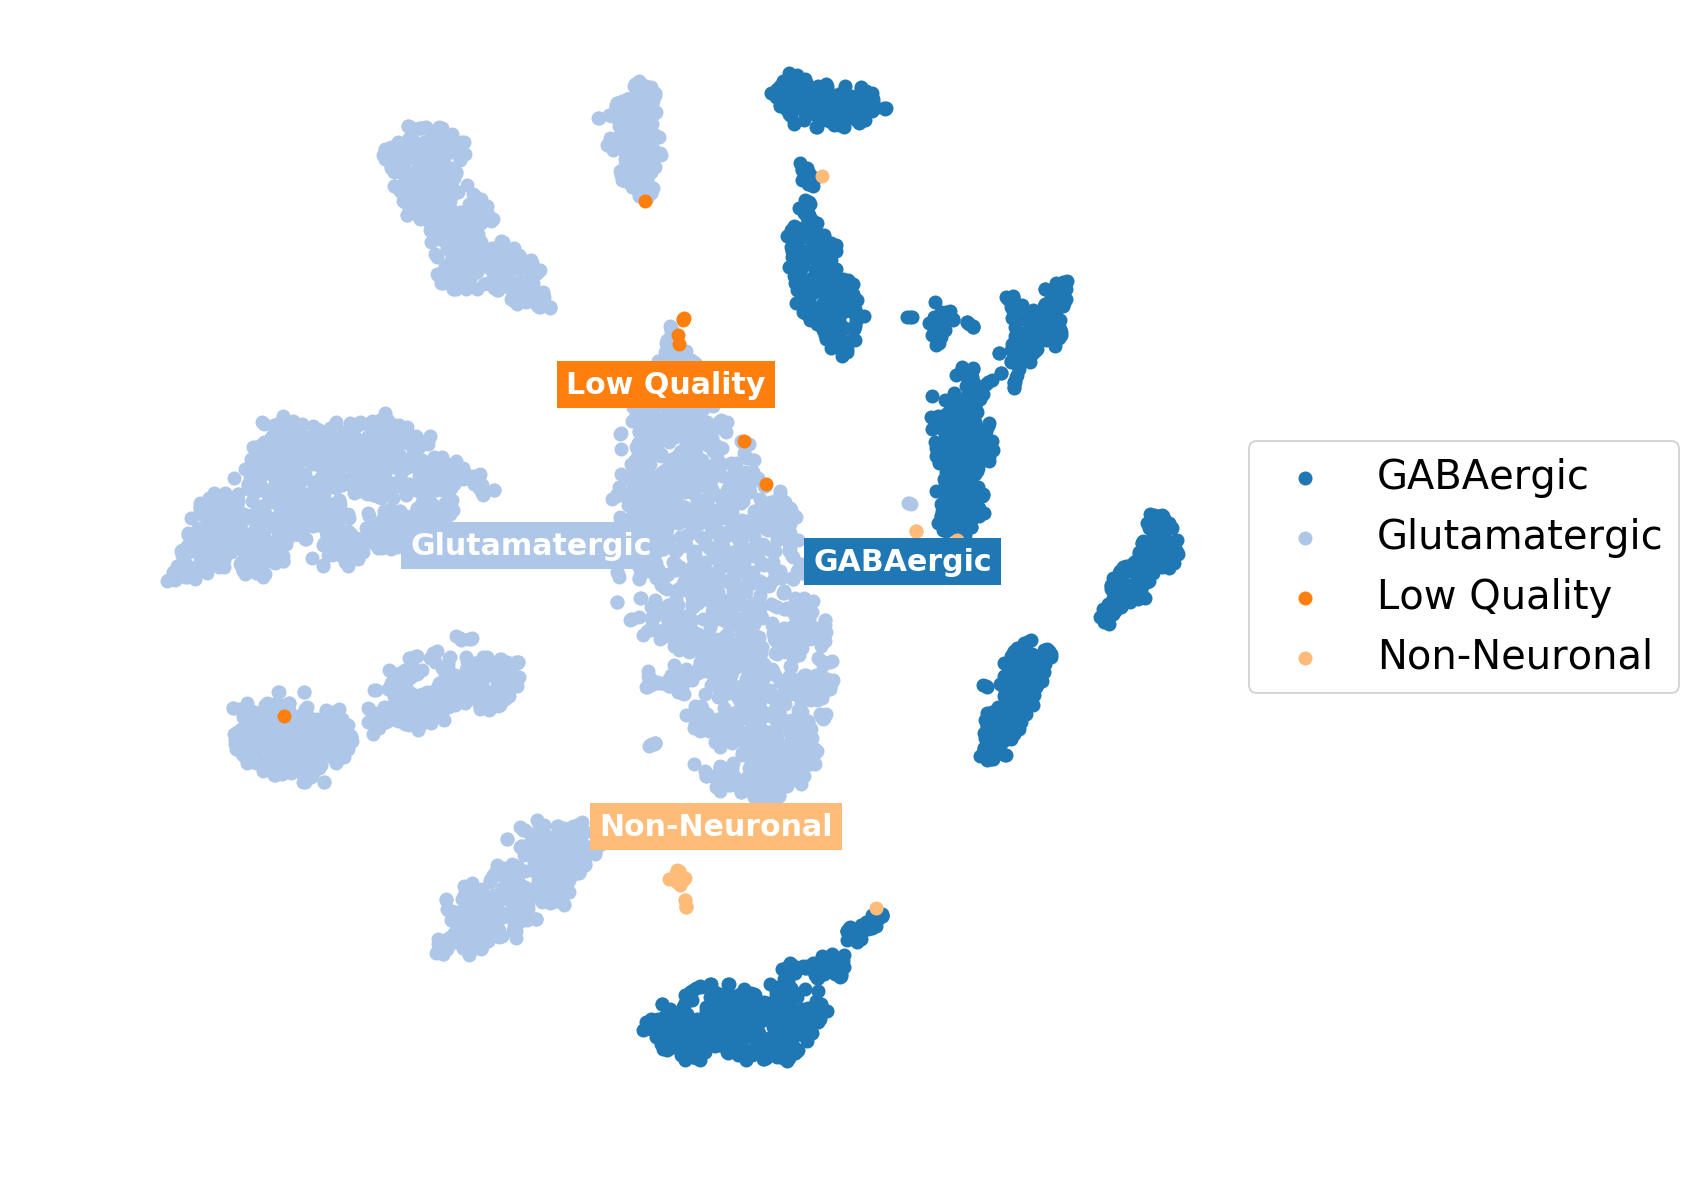

In [23]:
fig, ax = plt.subplots(figsize=(10,10))

c = gene.obs["class_label"].unique()
cmap = cm.get_cmap("tab20")

for idx, cluster in enumerate(c):
    XX = gene[gene.obs.class_label == cluster,:].obsm["X_nca_tsne"]
    
    x = XX[:,0]
    y = XX[:,1]
    
    ax.scatter(x, y, color = cmap(idx), label=cluster)
    ax.annotate(cluster, 
             (np.mean(x), np.mean(y)),
             horizontalalignment='center',
             verticalalignment='center',
             size=15, weight='bold',
             color="white",
               backgroundcolor=cmap(idx)) 
    

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_axis_off()
plt.show()

# Subclass examples

In [198]:
gene.obs.subclass_label.value_counts()

L5 IT          1560
L6 CT           904
L6b             568
Vip             555
Pvalb           496
L2/3 IT         482
L6 IT           395
Sst             391
Lamp5           348
L5/6 NP         207
Sncg             71
SMC              17
Low Quality      12
L5 ET            12
Endo              7
Astro             7
VLMC              6
L6 IT Car3        5
Name: subclass_label, dtype: int64

In [442]:
isoform.var[isoform.var.gene_name=="Pvalb"]

transcript_id             gene_id gene_name transcript_name  \
Pvalb-201  ENSMUST00000005860  ENSMUSG00000005716     Pvalb       Pvalb-201   
Pvalb-202  ENSMUST00000120592  ENSMUSG00000005716     Pvalb       Pvalb-202   

                gene_TPM  highly_variable     means  dispersions  \
Pvalb-201  895351.625000             True  4.939105     7.997375   
Pvalb-202    1444.452026            False  0.195840     3.126853   

           dispersions_norm  
Pvalb-201          6.315301  
Pvalb-202          0.259815

In [636]:
cm.get_cmap("nipy_spectral_r")(0)

(0.8, 0.8, 0.8, 1.0)

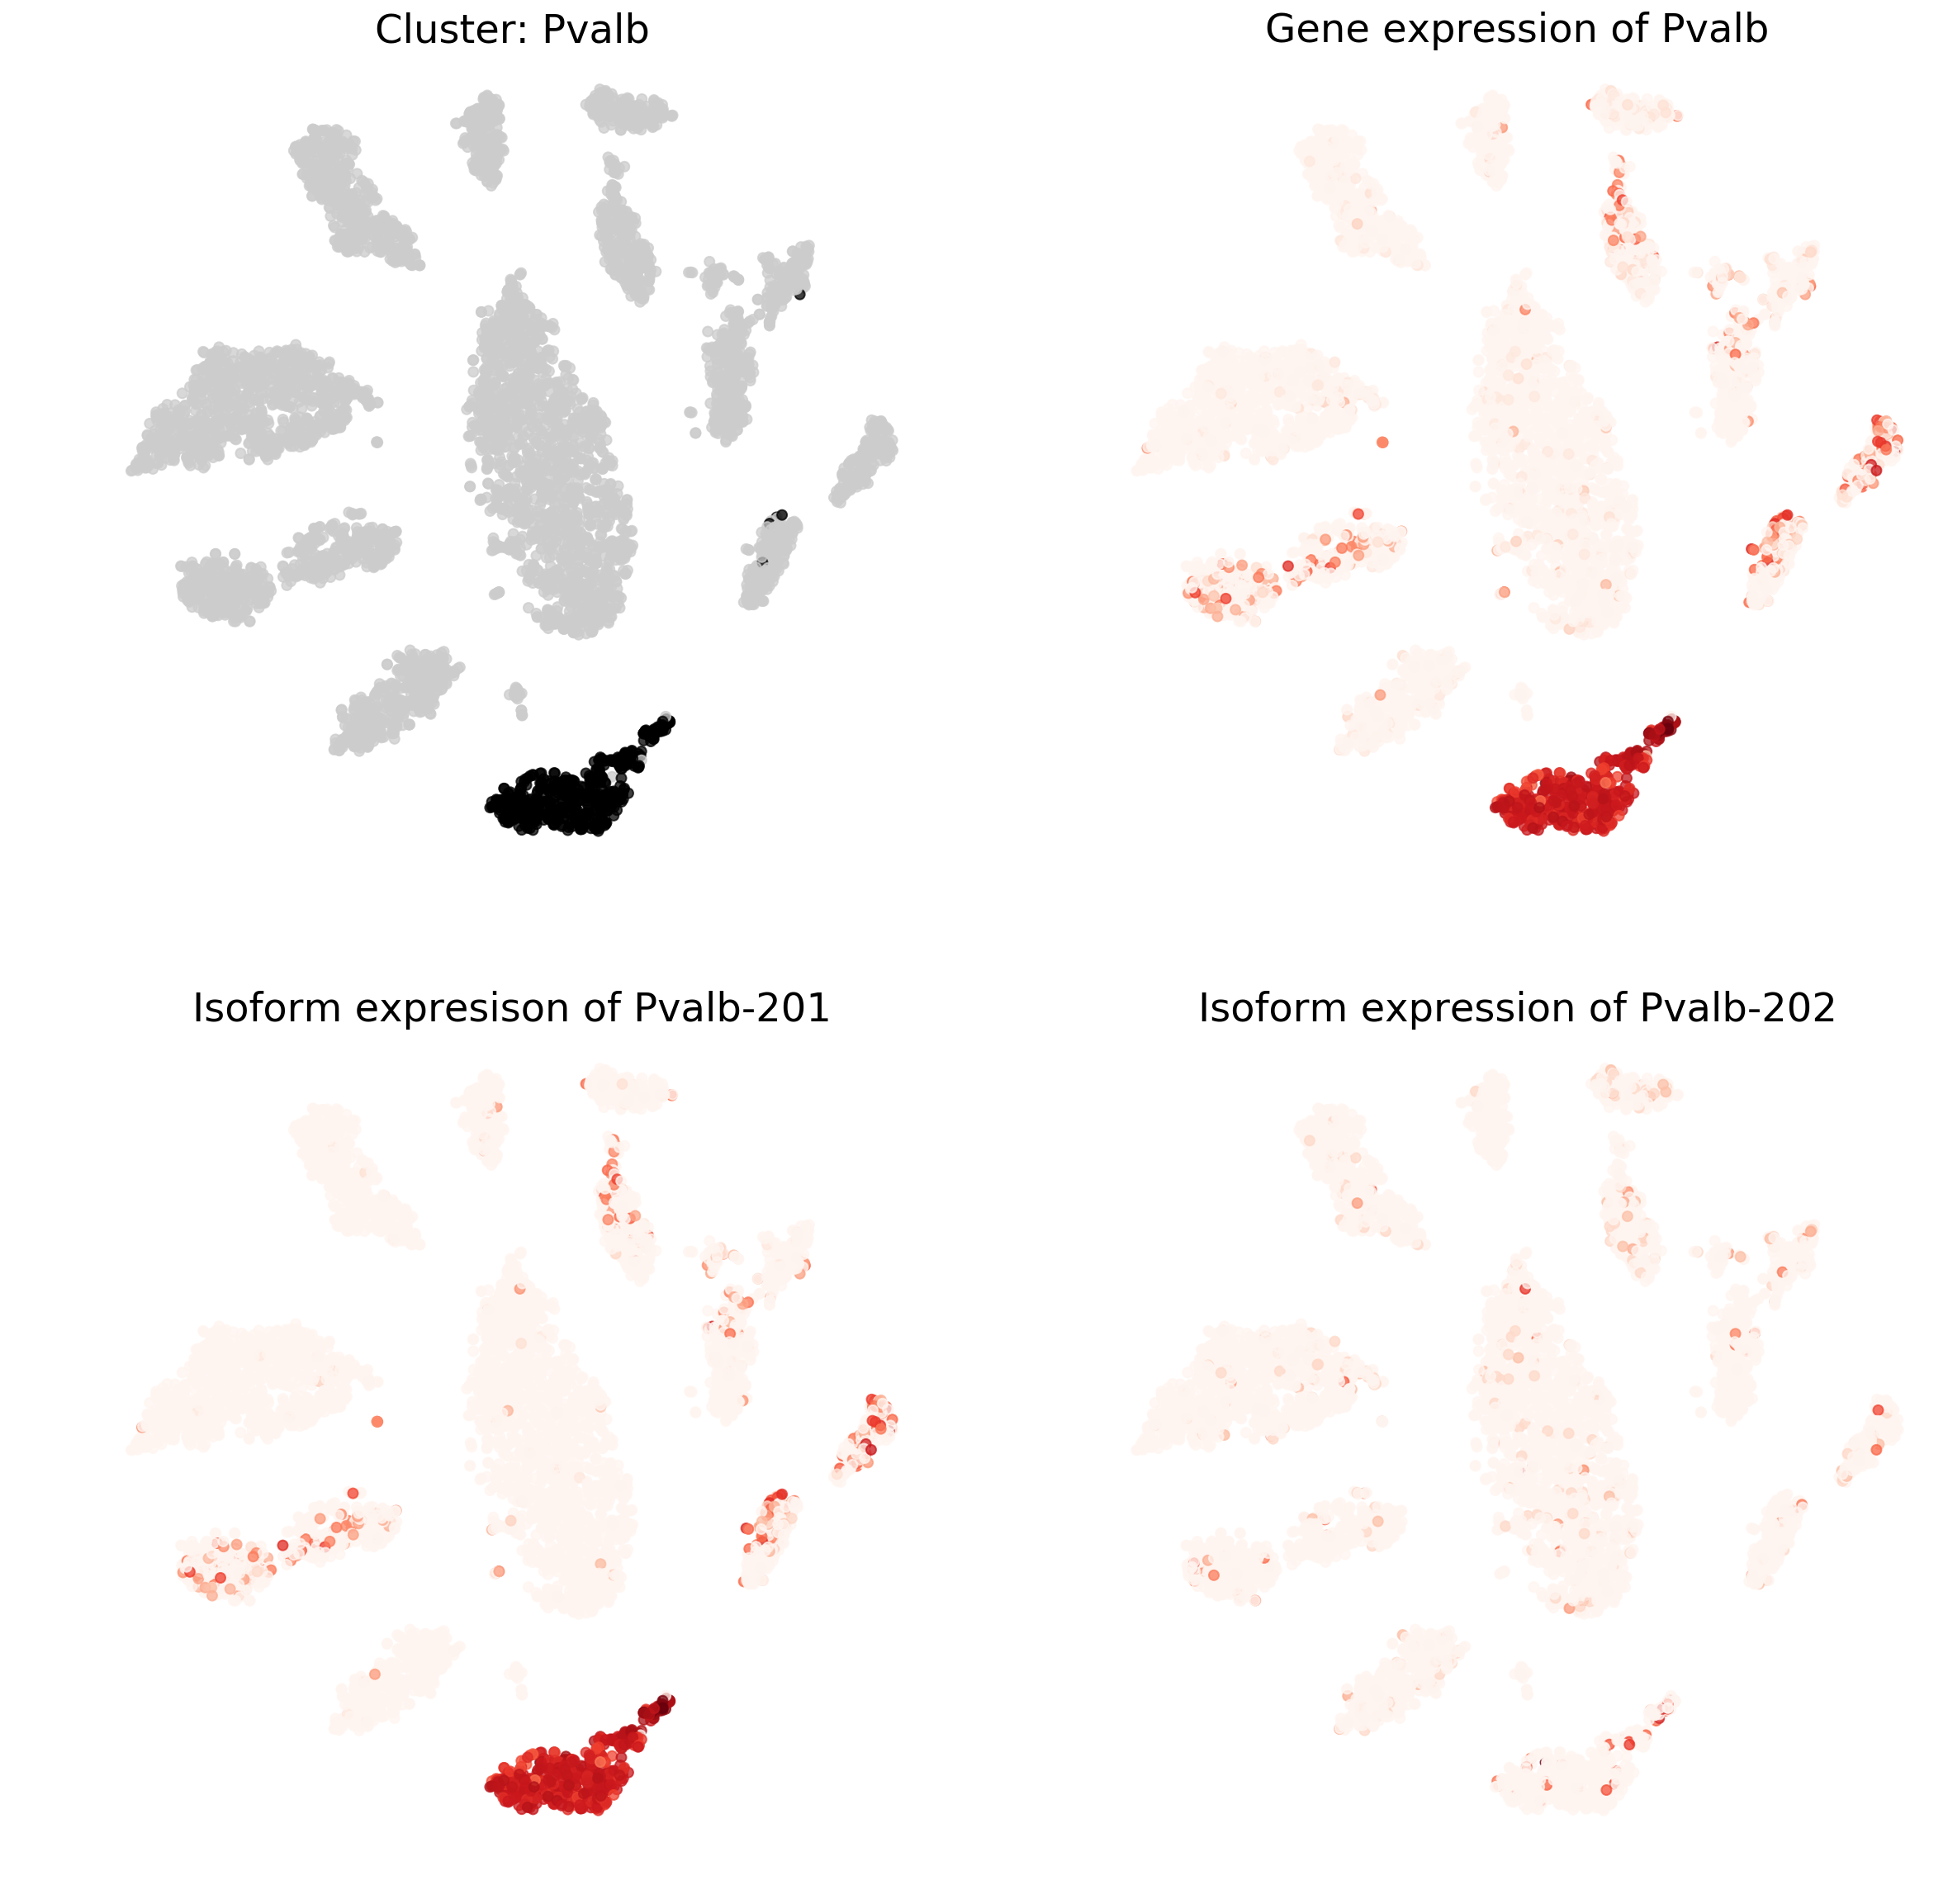

In [524]:
specific_gene = "Pvalb"
specific_isoform_1 = specific_gene + "-" + "201"
specific_isoform_2 = specific_gene + "-" + "202"
specific_cluster = "Pvalb"

fig, ax = plt.subplots(figsize=(20,20), ncols=2, nrows=2)


x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = gene.obs["subclass_label"]==specific_cluster
alpha=0.75
cmap="nipy_spectral_r"

ax[0,0].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[0,0].set_axis_off()
ax[0,0].set_title("Cluster: {}".format(specific_cluster))

x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(gene[:, gene.var.gene_name==specific_gene].layers["log1p"]).reshape(-1)
cmap="Reds"
alpha = 0.75
ax[0,1].set_title("Gene expression of {}".format(specific_gene))

ax[0,1].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[0,1].set_axis_off()




x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(isoform[:, isoform.var.transcript_name==specific_isoform_1].layers["log1p"].todense()).reshape(-1)
cmap="Reds"
alpha = 0.75
ax[1,0].set_title("Isoform expresison of {}".format(specific_isoform_1))

ax[1,0].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[1,0].set_axis_off()


x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(isoform[:, isoform.var.transcript_name==specific_isoform_2].layers["log1p"].todense()).reshape(-1)
cmap="Reds"
alpha = 0.75
ax[1,1].set_title("Isoform expression of {}".format(specific_isoform_2))

ax[1,1].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[1,1].set_axis_off()


plt.savefig("./level_2_fig/smartseq_merfish_ssnca_{}.png".format(specific_gene),bbox_inches='tight', dpi=300)

plt.show()

In [581]:
cluster_cmap

{'Astro': (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 'Endo': (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 'L2/3 IT': (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
 'L5 ET': (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 'L5 IT': (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 'L5/6 NP': (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 'L6 CT': (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 'L6 IT': (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 'L6 IT Car3': (1.0, 0.4980392156862745, 0.054901960784313725),
 'L6b': (1.0, 0.7333333333333333, 0.47058823529411764),
 'Low Quality': (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 'SMC': (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 'VLMC': (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 'Lamp5': (0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 'S

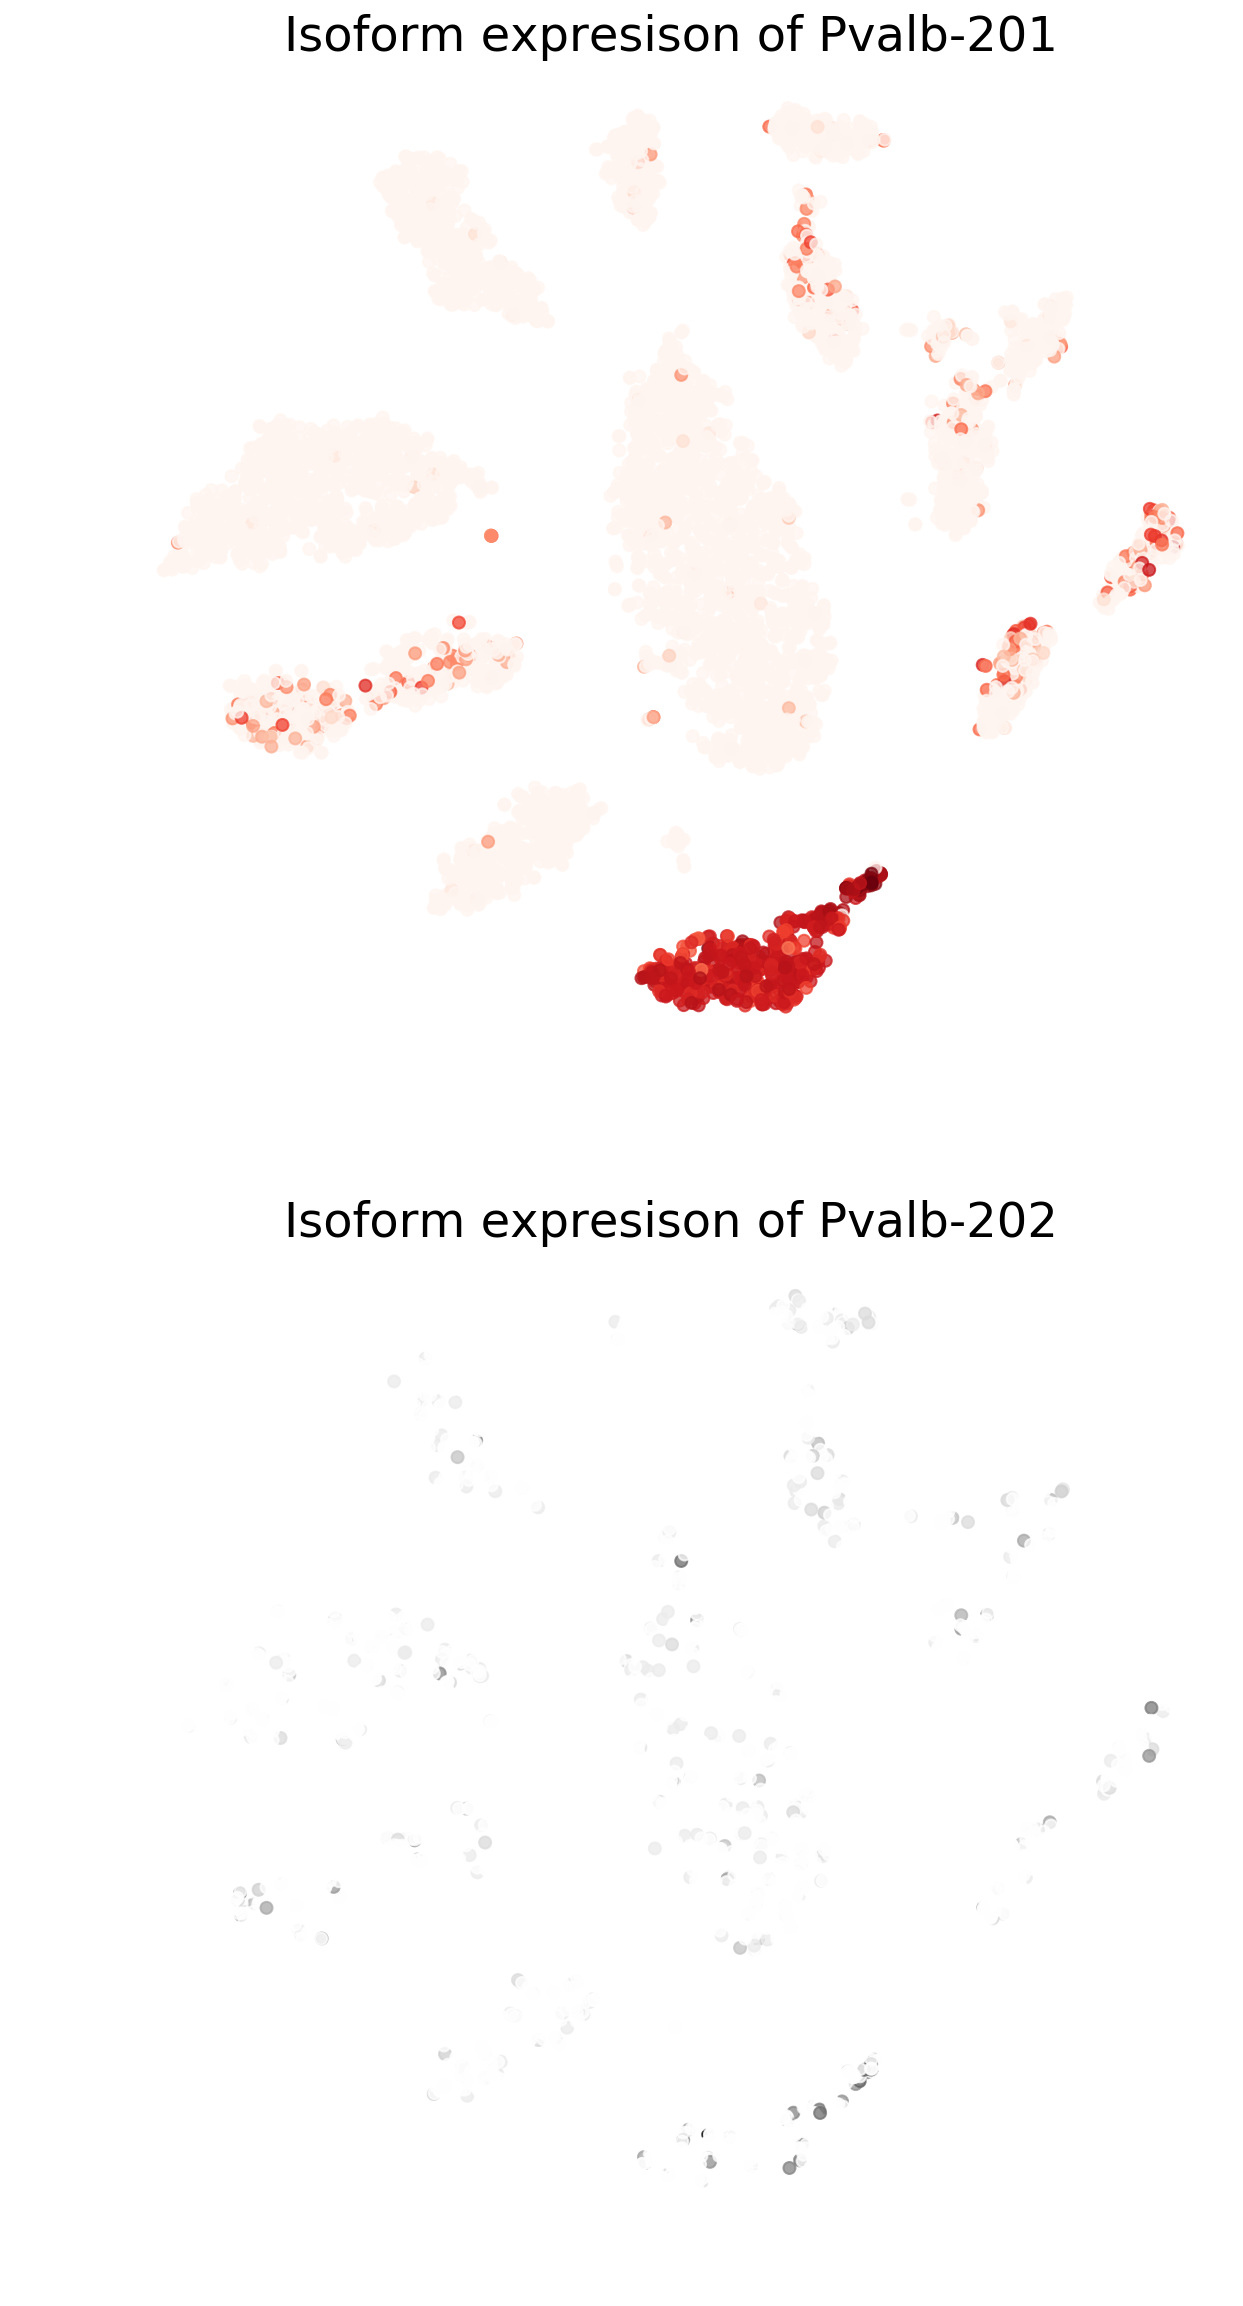

In [651]:
specific_gene = "Pvalb"
specific_isoform_1 = specific_gene + "-" + "201"
specific_isoform_2 = specific_gene + "-" + "202"
specific_cluster = "Pvalb"

complement_color = (0.8, 0.8, 0.8, 1.0)

fig, ax = plt.subplots(figsize=(10,20), nrows=2)


x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(isoform[:, isoform.var.transcript_name==specific_isoform_1].layers["log1p"].todense()).reshape(-1)
cmap="Reds"
alpha = 0.75
ax[0].set_title("Isoform expresison of {}".format(specific_isoform_1))

ax[0].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[0].set_axis_off()


x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(isoform[:, isoform.var.transcript_name==specific_isoform_2].layers["log1p"].todense()).reshape(-1)
cmap="Greys"
alpha = 0.75
ax[1].set_title("Isoform expresison of {}".format(specific_isoform_2))

ax[1].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[1].set_axis_off()

plt.savefig("./level_2_fig/smartseq_merfish_ssnca_{}.png".format(specific_gene),bbox_inches='tight', dpi=300)

plt.show()

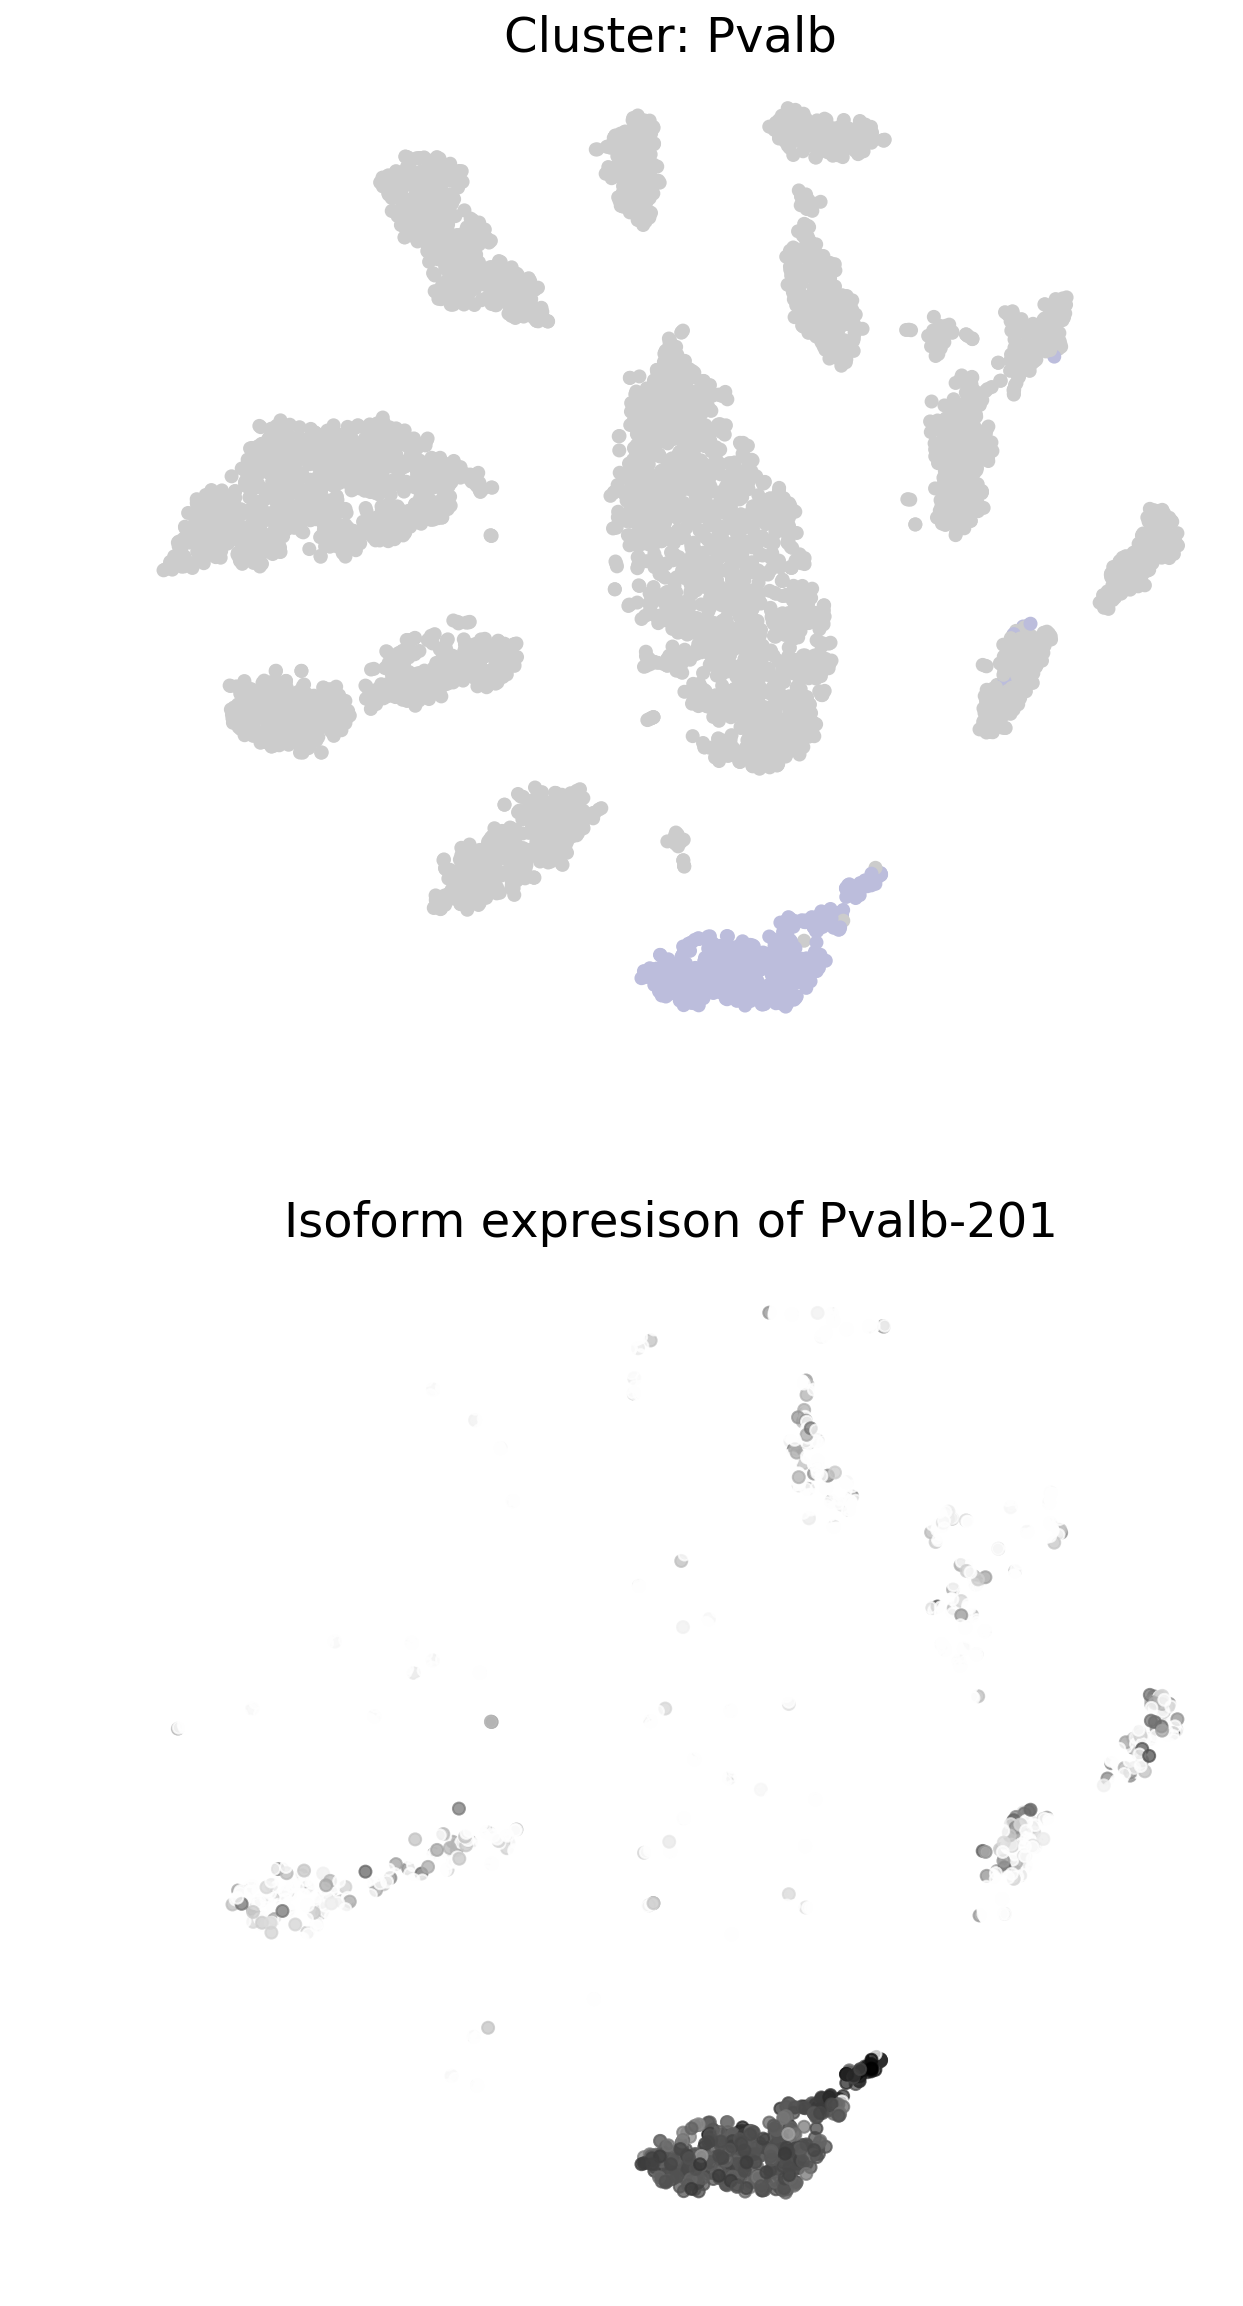

In [652]:
specific_gene = "Pvalb"
specific_isoform_1 = specific_gene + "-" + "201"
specific_isoform_2 = specific_gene + "-" + "202"
specific_cluster = "Pvalb"

complement_color = (0.8, 0.8, 0.8, 1.0)

fig, ax = plt.subplots(figsize=(10,20), nrows=2)

x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = gene.obs["subclass_label"].astype(str).map(cluster_cmap)

c = gene.obs["subclass_label"].astype(str).map(cluster_cmap).tolist()
indices = np.where(gene.obs["subclass_label"]!=specific_cluster)[0]
replacements=[complement_color]*len(indices)
for (index, replacement) in zip(indices, replacements):
    c[index] = replacement

alpha=0.75


ax[0].scatter(x, y, c=c)
ax[0].set_axis_off()
ax[0].set_title("Cluster: {}".format(specific_cluster))


x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(isoform[:, isoform.var.transcript_name==specific_isoform_1].layers["log1p"].todense()).reshape(-1)
cmap="Greys"
alpha = 0.75
ax[1].set_title("Isoform expresison of {}".format(specific_isoform_1))

ax[1].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[1].set_axis_off()

#plt.savefig("./level_2_fig/smartseq_merfish_ssnca_{}.png".format(specific_gene),bbox_inches='tight', dpi=300)

plt.show()

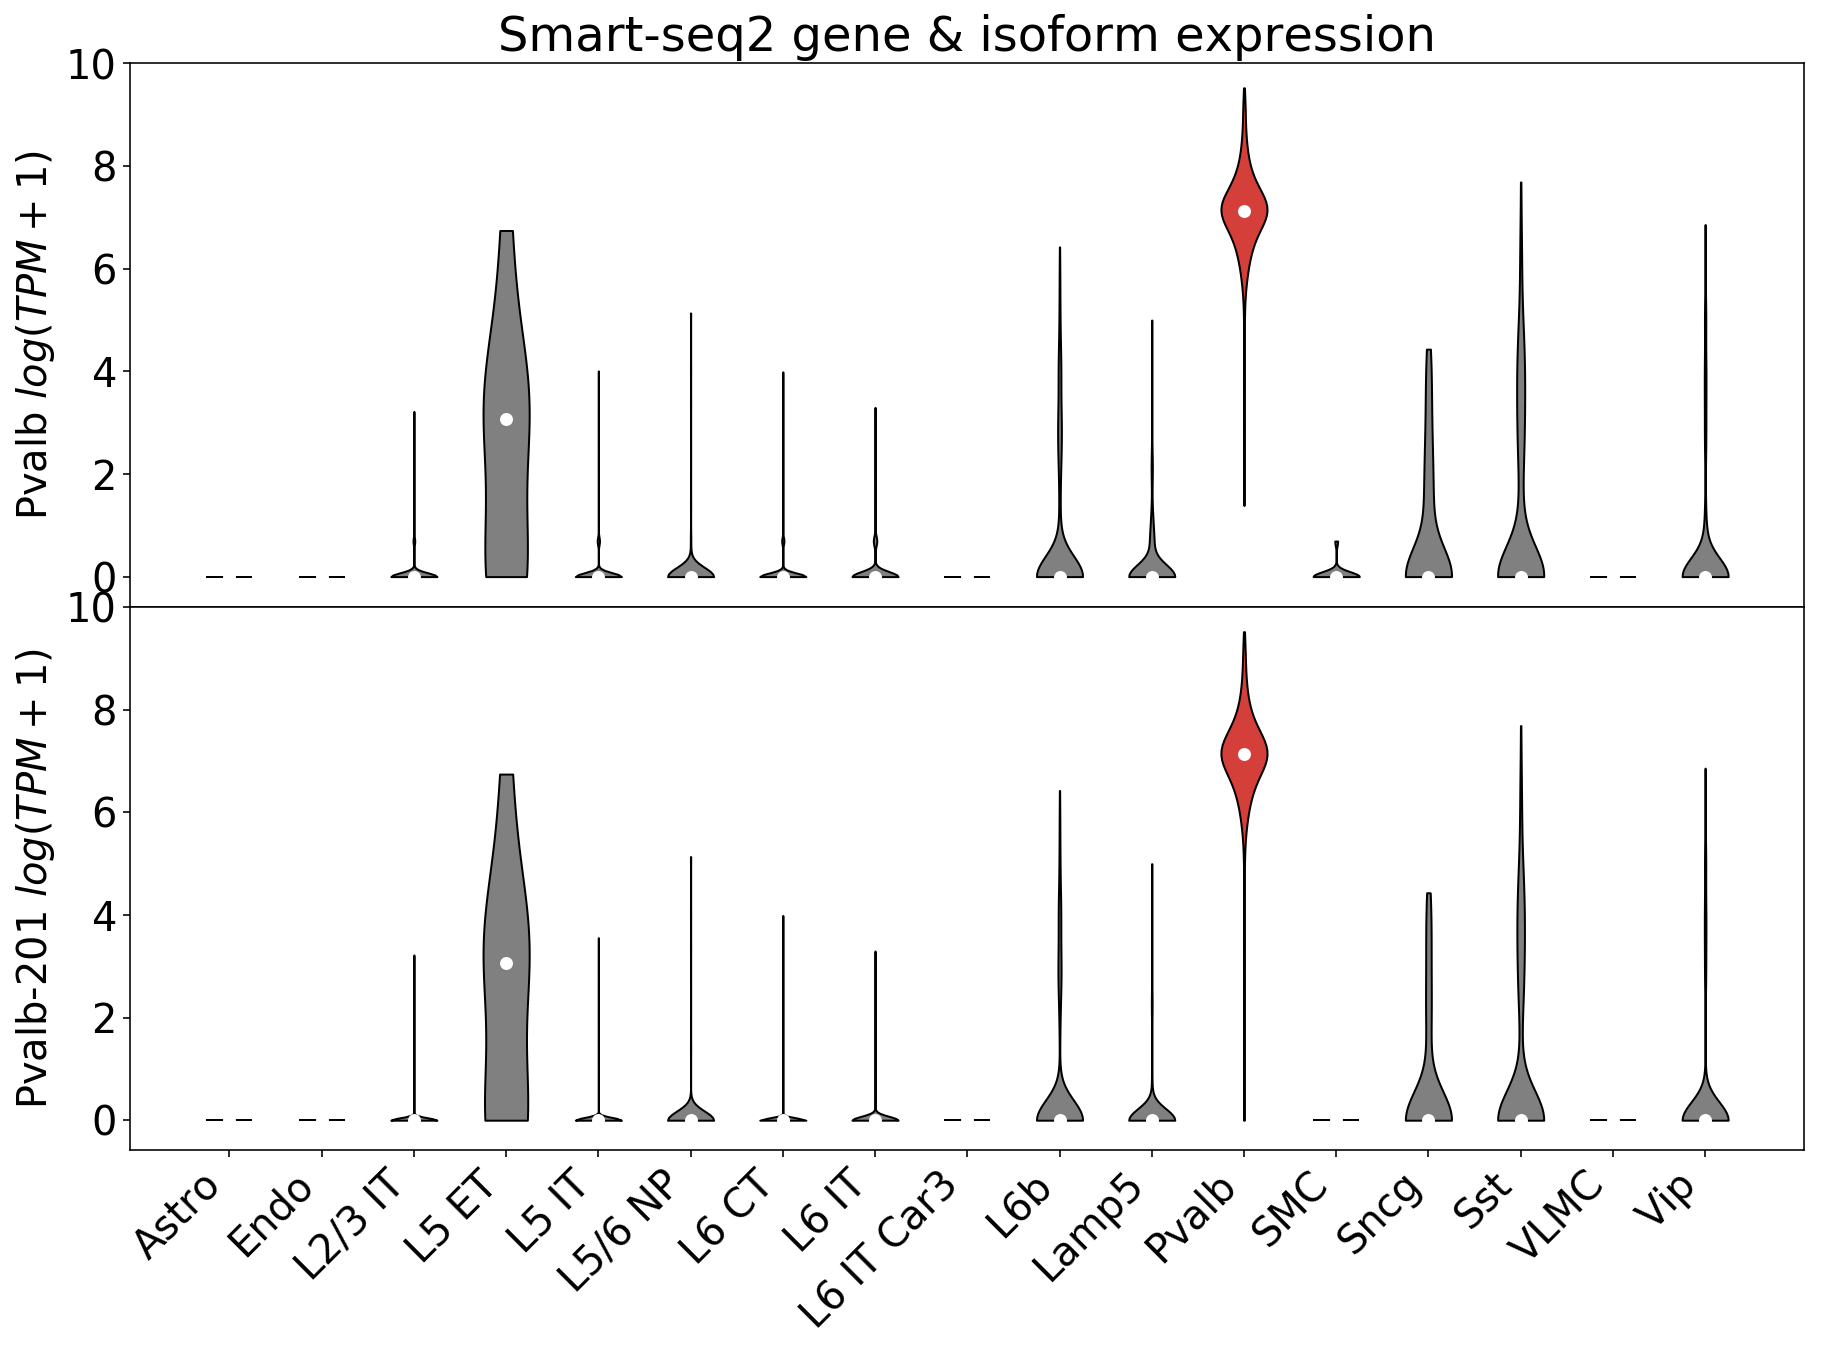

In [653]:
fig, ax = plt.subplots(figsize=(15,10), nrows=2, sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)

unique = np.unique(gene.obs.subclass_label)
unique = np.delete(unique, np.where(unique=="Low Quality"))
labels = unique
lidx = np.arange(1, len(labels)+1)  # the label locations
midx = np.where(unique==specific_cluster)[0][0]
#######3# Gene
x = []
for c in unique:
    x.append(np.asarray(gene[gene.obs.subclass_label==c][:,gene.var.gene_name==specific_gene].layers["log1p"]).reshape(-1).tolist())

parts = ax[0].violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor('#D43F3A')

medians = [np.median(i) for i in x]
ax[0].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)

#ax[0].axhline(y=medians[midx], color="k")
ax[0].set_ylabel("{} $log(TPM + 1)$".format(specific_gene))
######## Isoform
x = []
for c in unique:
    x.append(np.asarray(isoform[isoform.obs.subclass_label==c][:,isoform.var.transcript_name==specific_isoform_1].layers["log1p"].todense()).reshape(-1).tolist())

parts = ax[1].violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor('#D43F3A')

medians = [np.median(i) for i in x]
ax[1].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)
#ax[1].axhline(y=medians[midx], color="k")
ax[1].set_xticks(lidx)
ax[1].set_xticklabels(labels, rotation=45, ha="right")
ax[1].set_ylabel("{} $log(TPM + 1)$".format(specific_isoform_1))
ymin, ymax = ax[0].get_ylim()
ax[1].set_ylim((ymin, ymax))
ax[0].set_title("Smart-seq2 gene & isoform expression")
plt.savefig("./level_2_fig/merfish_smartseq_ssviolin_{}.png".format(specific_gene), bbox_inches='tight',dpi=300)
plt.show()

good examples: 
- (Arpp21-206, L2/3 IT), 
- (CCdc12-210, L6 CT) 
- (Pde4d-209, L6 CT) 
- (Pde4d-211, L6 CT) 
- (Satb1-208, Sst) 
- (Fgf13-203, Lamp5) 
- (Igsf11-201, Lamp5) 
- (Unc5c-208, L5/6 NP) 
- (Erc2-207, L6 IT)
- (Erc2-207, L2/3 IT)
- (TPM1-216, L6 IT)
- (Cldnd1-205, L6b)
- (Pde4d-211, L6b)
- (Tmem243-201, L6b)
- (Enpp2-207, L2/3 IT)
- Snrpn (check)

In [516]:
isoform.var[isoform.var["gene_name"]=="Igfbp4"]

transcript_id             gene_id gene_name transcript_name  \
Igfbp4-201  ENSMUST00000017637  ENSMUSG00000017493    Igfbp4      Igfbp4-201   
Igfbp4-205  ENSMUST00000177092  ENSMUSG00000017493    Igfbp4      Igfbp4-205   
Igfbp4-206  ENSMUST00000177105  ENSMUSG00000017493    Igfbp4      Igfbp4-206   
Igfbp4-203  ENSMUST00000130530  ENSMUSG00000017493    Igfbp4      Igfbp4-203   
Igfbp4-202  ENSMUST00000123946  ENSMUSG00000017493    Igfbp4      Igfbp4-202   
Igfbp4-204  ENSMUST00000140772  ENSMUSG00000017493    Igfbp4      Igfbp4-204   

                gene_TPM  highly_variable     means  dispersions  \
Igfbp4-201  1.130850e+06             True  5.231401     6.200097   
Igfbp4-205  2.066068e+03            False  0.289675     1.773535   
Igfbp4-206  7.767892e+03            False  0.822140     1.688896   
Igfbp4-203  2.998998e+05            False  3.919775     5.003331   
Igfbp4-202  3.638158e+02            False  0.056277     1.646569   
Igfbp4-204  1.014180e+03            False  0.149256     2.543618   

            dispersions_norm  
Igfbp4-201          2.464472  
Igfbp4-205         -1.156840  
Igfbp4-206         -1.903843  
Igfbp4-203          0.909286  
Igfbp4-202         -1.289747  
Igfbp4-204         -0.350716

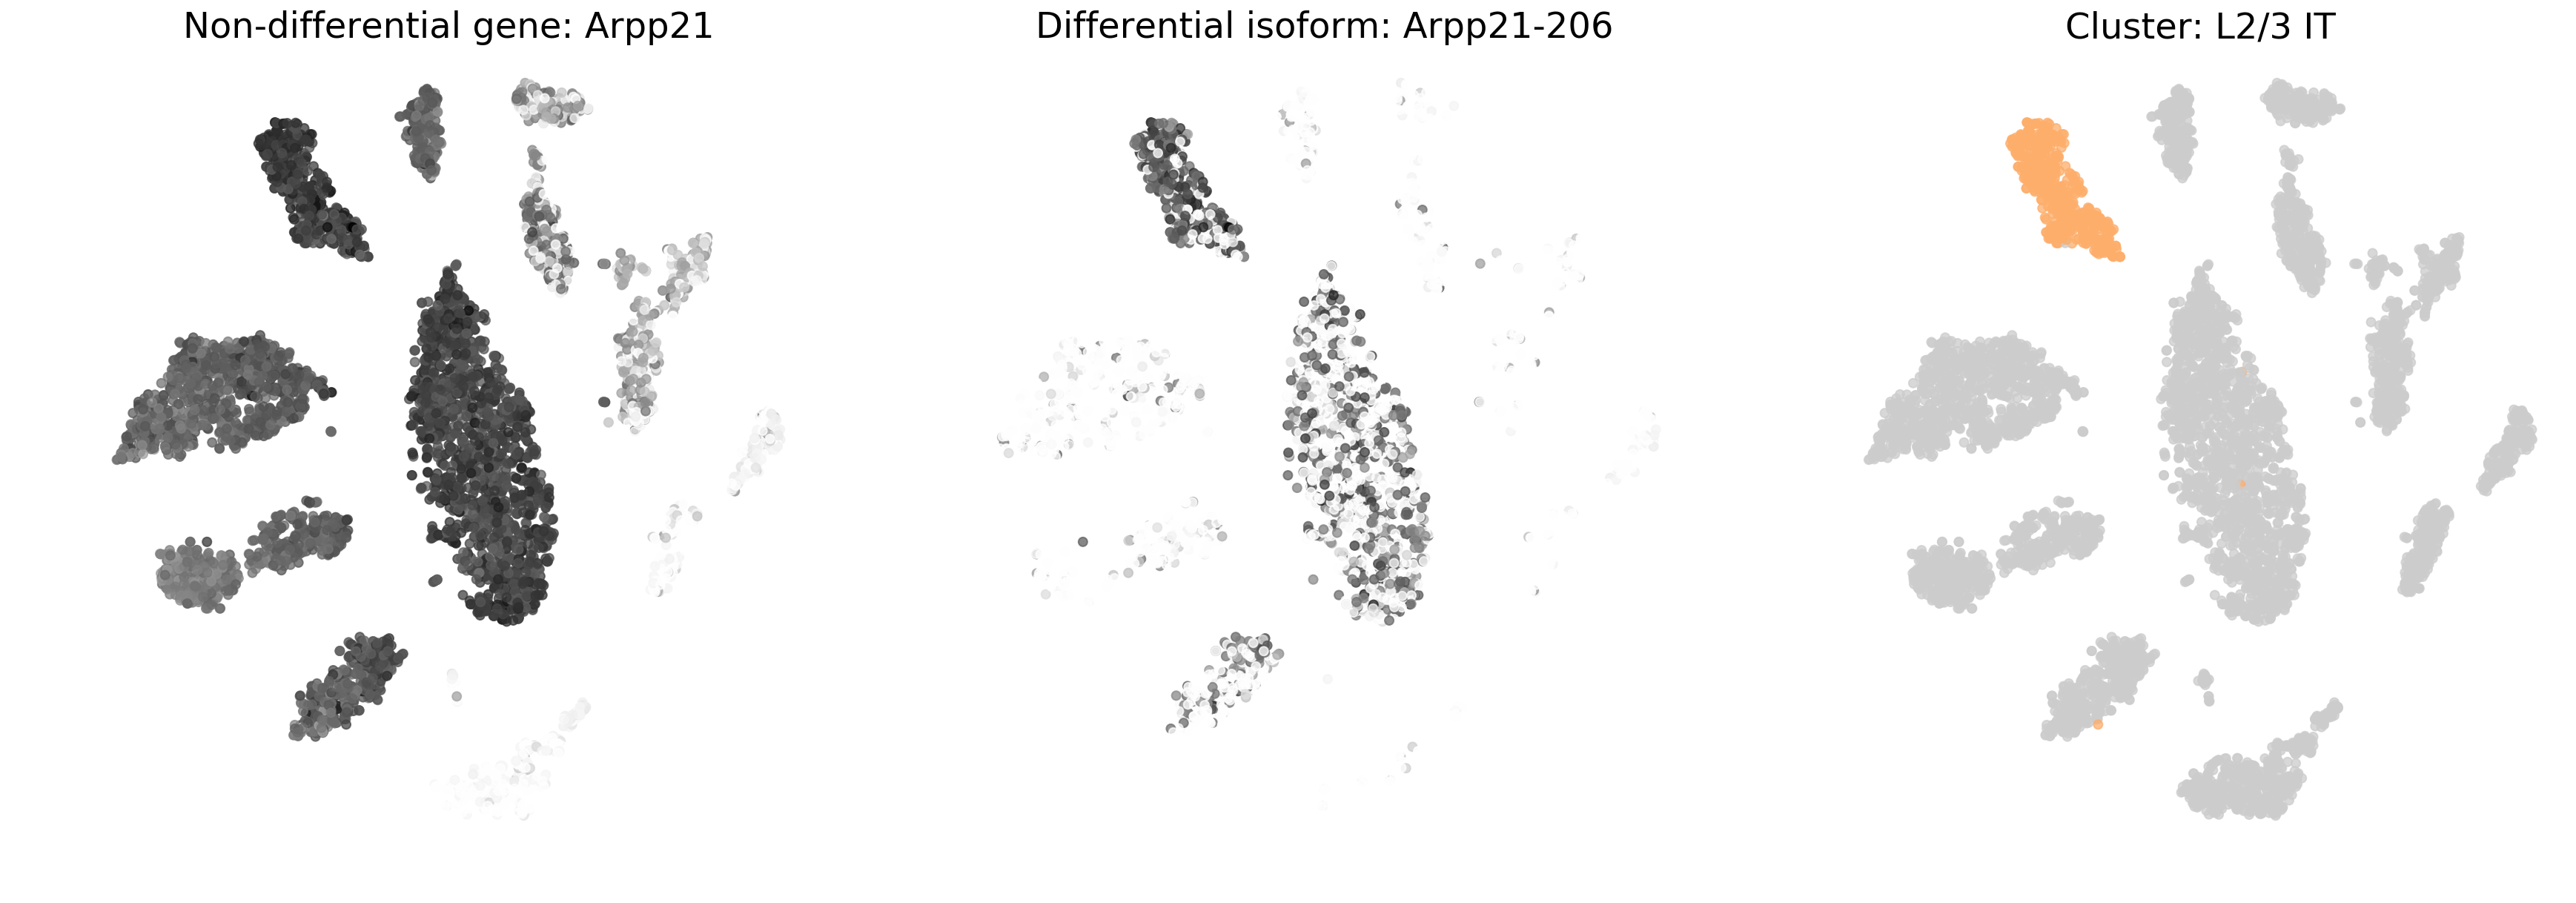

In [649]:
specific_gene = "Arpp21"
specific_isoform = specific_gene + "-" + "206"
specific_cluster = "L2/3 IT"
complement_color = (0.8, 0.8, 0.8, 1.0)

fig, ax = plt.subplots(figsize=(30,10), ncols=3)

x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(gene[:, gene.var.gene_name==specific_gene].layers["log1p"]).reshape(-1)
cmap="Greys"
alpha = 0.75
ax[0].set_title("Non-differential gene: {}".format(specific_gene))

ax[0].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[0].set_axis_off()


x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(isoform[:, isoform.var.transcript_name==specific_isoform].layers["log1p"].todense()).reshape(-1)
cmap="Greys"
alpha = 0.75
ax[1].set_title("Differential isoform: {}".format(specific_isoform))

ax[1].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[1].set_axis_off()

x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = gene.obs["subclass_label"]==specific_cluster
c = gene.obs["subclass_label"].astype(str).map(cluster_cmap).tolist()
indices = np.where(gene.obs["subclass_label"]!=specific_cluster)[0]
replacements=[complement_color]*len(indices)
for (index, replacement) in zip(indices, replacements):
    c[index] = replacement
alpha=0.75
cmap="nipy_spectral_r"

ax[2].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[2].set_axis_off()
ax[2].set_title("Cluster: {}".format(specific_cluster))
plt.savefig("./level_2_fig/hidden_gene_nca_{}.png".format(specific_gene), bbox_inches='tight',dpi=300)
plt.show()

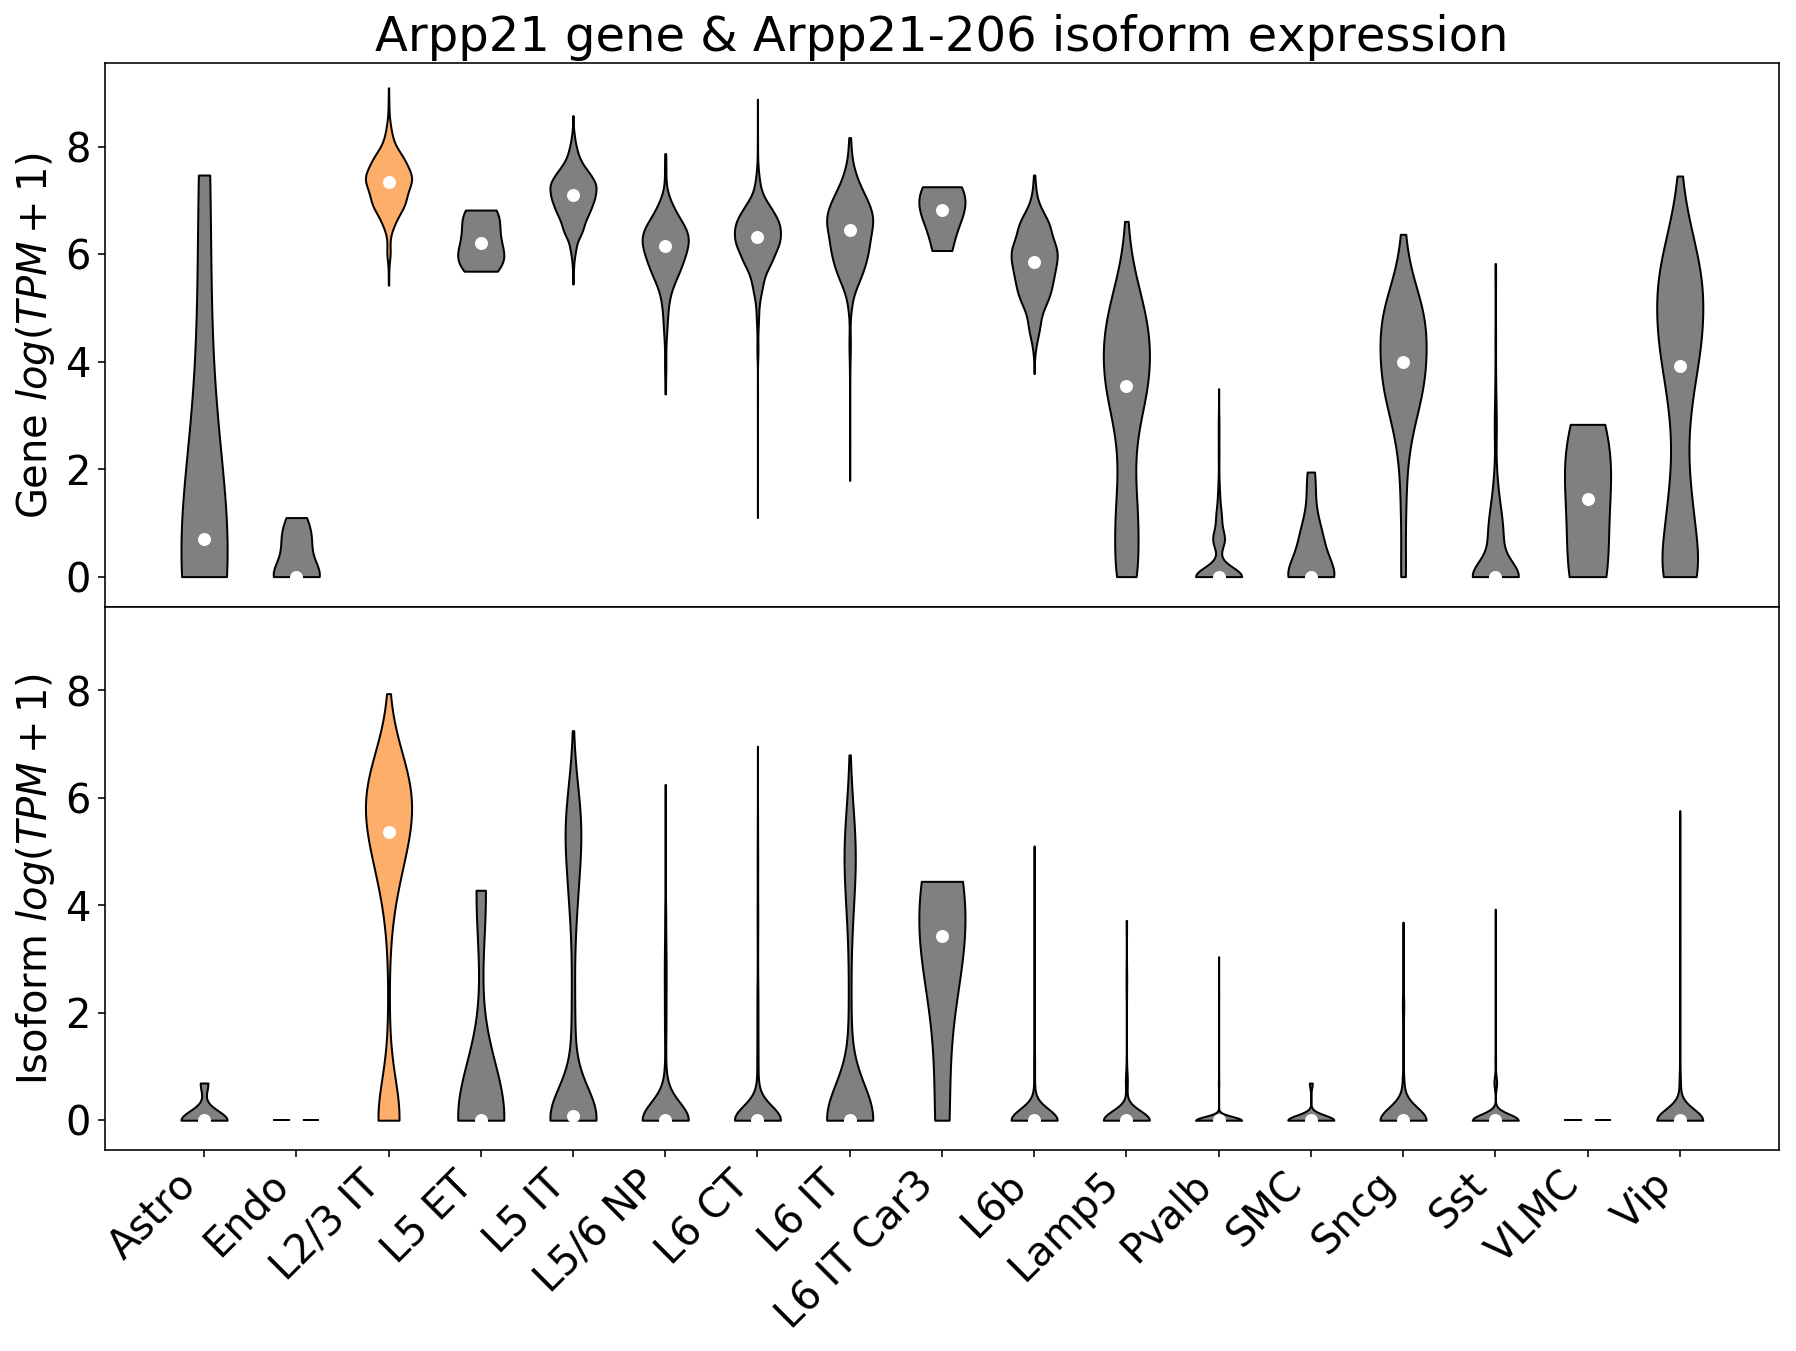

In [650]:
fig, ax = plt.subplots(figsize=(15,10), nrows=2, sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)

unique = np.unique(gene.obs.subclass_label)
unique = np.delete(unique, np.where(unique=="Low Quality"))
labels = unique
lidx = np.arange(1, len(labels)+1)  # the label locations
midx = np.where(unique==specific_cluster)[0][0]
#######3# Gene
x = []
for c in unique:
    x.append(np.asarray(gene[gene.obs.subclass_label==c][:,gene.var.gene_name==specific_gene].layers["log1p"]).reshape(-1).tolist())

parts = ax[0].violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor(cluster_cmap[specific_cluster])

medians = [np.median(i) for i in x]
ax[0].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)

#ax[0].axhline(y=medians[midx], color="k")
ax[0].set_ylabel("Gene $log(TPM + 1)$")
######## Isoform
x = []
for c in unique:
    x.append(np.asarray(isoform[isoform.obs.subclass_label==c][:,isoform.var.transcript_name==specific_isoform].layers["log1p"].todense()).reshape(-1).tolist())

parts = ax[1].violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor(cluster_cmap[specific_cluster])

medians = [np.median(i) for i in x]
ax[1].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)
#ax[1].axhline(y=medians[midx], color="k")
ax[1].set_xticks(lidx)
ax[1].set_xticklabels(labels, rotation=45, ha="right")
ax[1].set_ylabel("Isoform $log(TPM + 1)$")
ymin, ymax = ax[0].get_ylim()
ax[1].set_ylim((ymin, ymax))
ax[0].set_title("{} gene & {} isoform expression".format(specific_gene, specific_isoform))
plt.savefig("./level_2_fig/hidden_gene_violin_{}.png".format(specific_gene), bbox_inches='tight',dpi=300)
plt.show()

# Class examples

In [410]:
gene.obs.class_label.value_counts()

Glutamatergic    4133
GABAergic        1861
Non-Neuronal       37
Low Quality        12
Name: class_label, dtype: int64

- (H3f3b-204, Glutamatergic)
- (Magi2-202, Glutamatergic)
- (Pclo-204, Glutamatergic)

In [509]:
Add Gad1

SyntaxError: invalid syntax (<ipython-input-509-b154bceb76ae>, line 1)

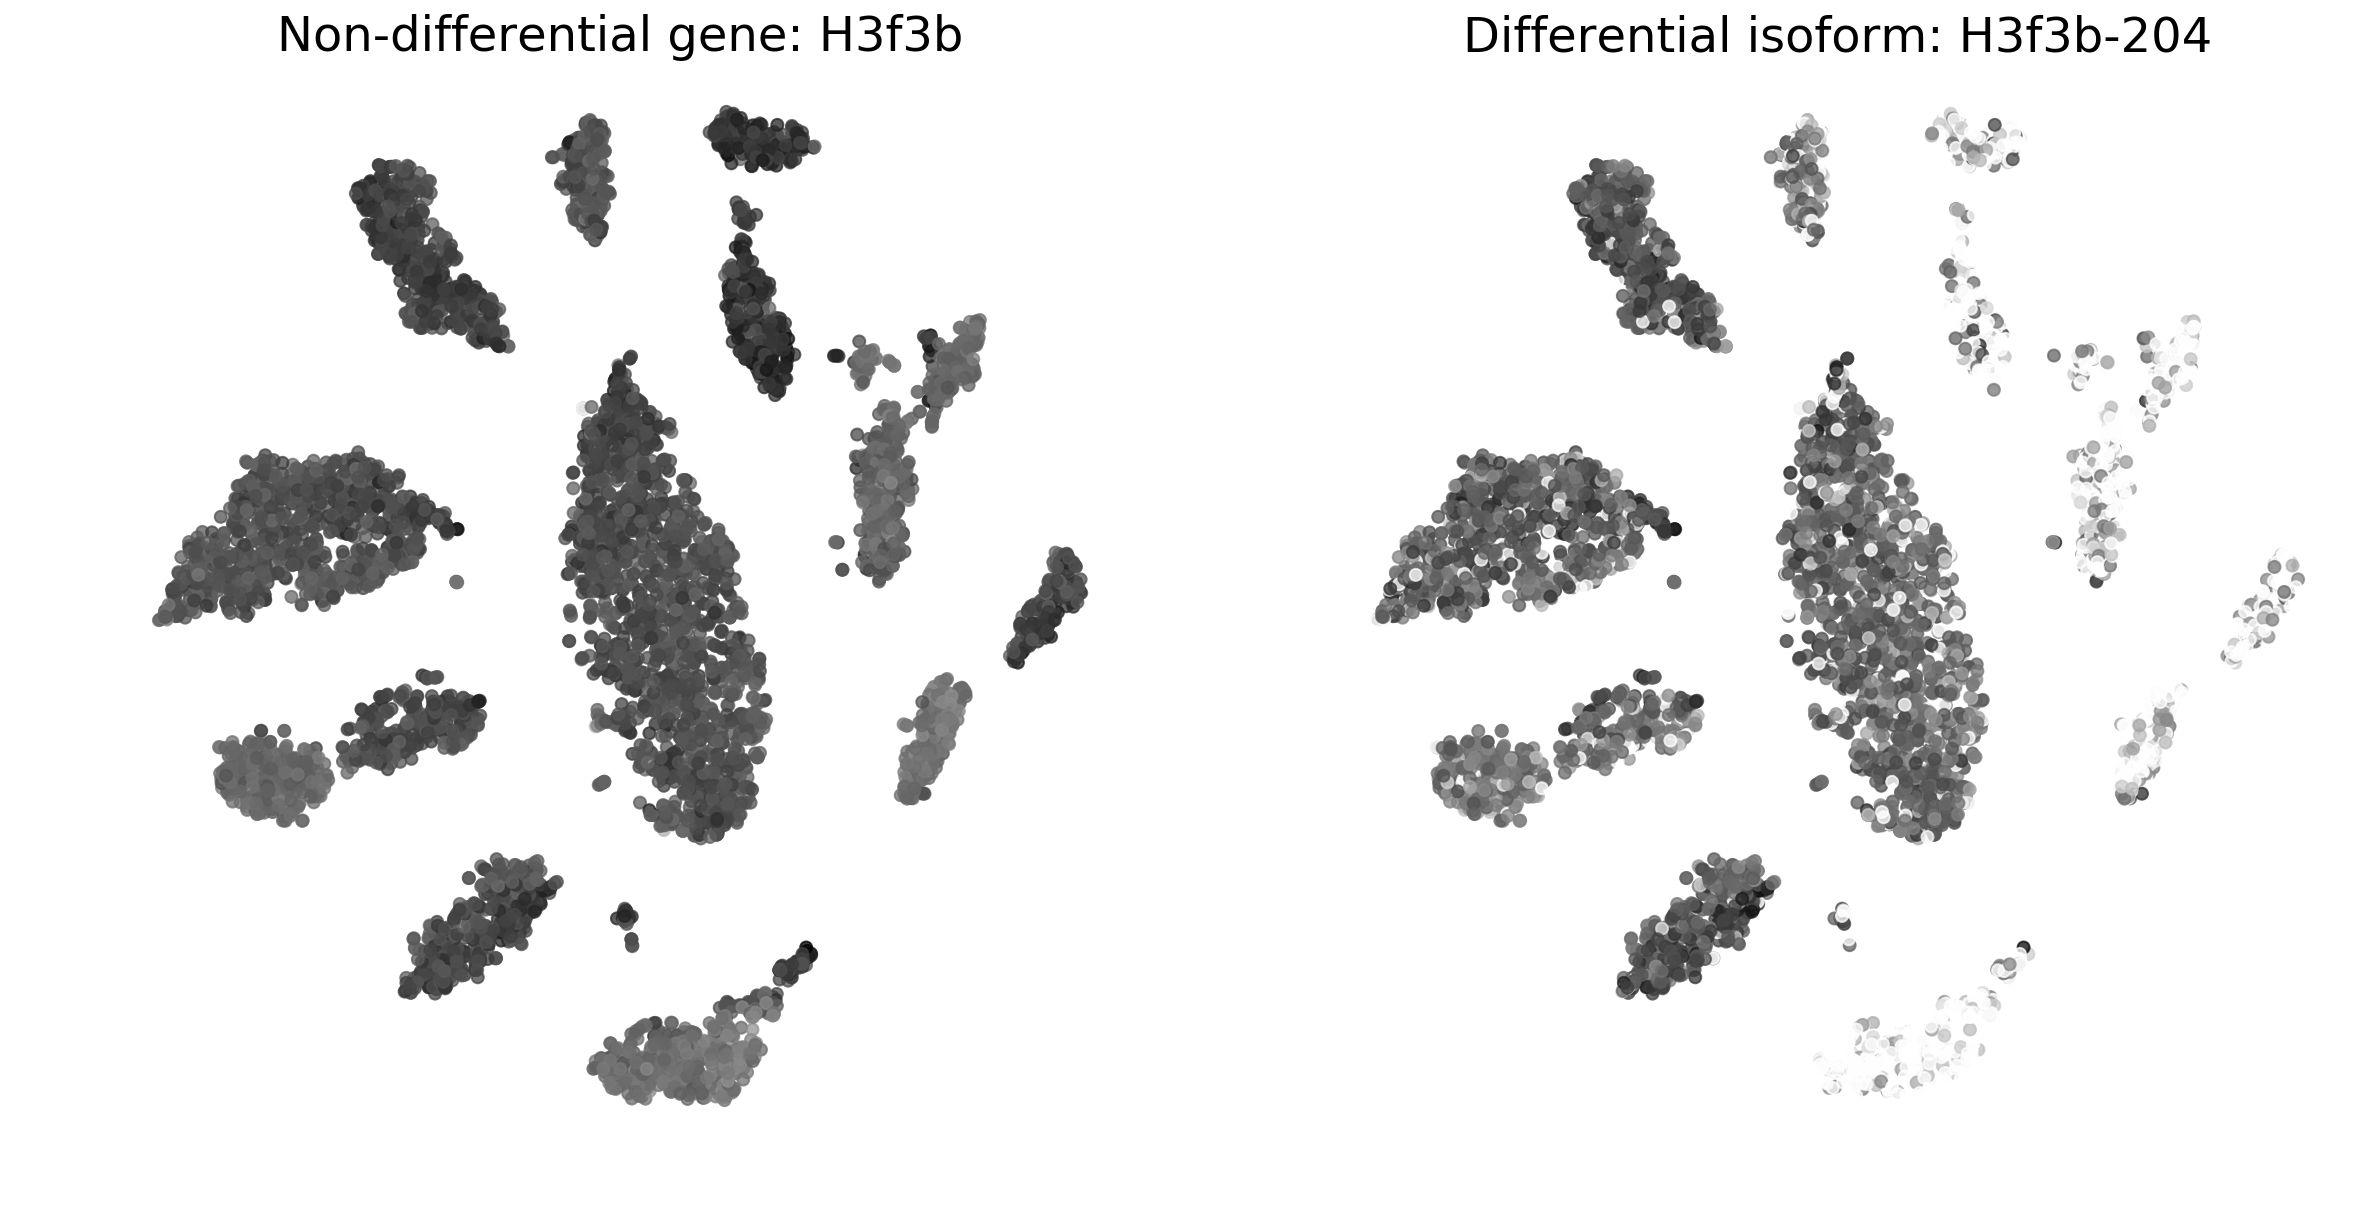

In [552]:
specific_gene = "H3f3b"
specific_isoform = specific_gene + "-" + "204"
specific_cluster = "Glutamatergic"

fig, ax = plt.subplots(figsize=(20,10), ncols=2)# , ncols=3)

x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(gene[:, gene.var.gene_name==specific_gene].layers["log1p"]).reshape(-1)
cmap="Greys"
alpha = 0.75
ax[0].set_title("Non-differential gene: {}".format(specific_gene))

ax[0].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[0].set_axis_off()


x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(isoform[:, isoform.var.transcript_name==specific_isoform].layers["log1p"].todense()).reshape(-1)
cmap="Greys"
alpha = 0.75
ax[1].set_title("Differential isoform: {}".format(specific_isoform))

ax[1].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[1].set_axis_off()

# x = gene.obsm["X_nca_tsne"][:,0]
# y = gene.obsm["X_nca_tsne"][:,1]
# c = gene.obs["class_label"]==specific_cluster
# alpha=0.75
# cmap="nipy_spectral_r"
# 
# ax[2].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
# ax[2].set_axis_off()
# ax[2].set_title("Cluster: {}".format(specific_cluster))
plt.savefig("./level_1_fig/{}_glut_nca.png".format(specific_isoform),bbox_inches='tight', dpi=300)
plt.show()

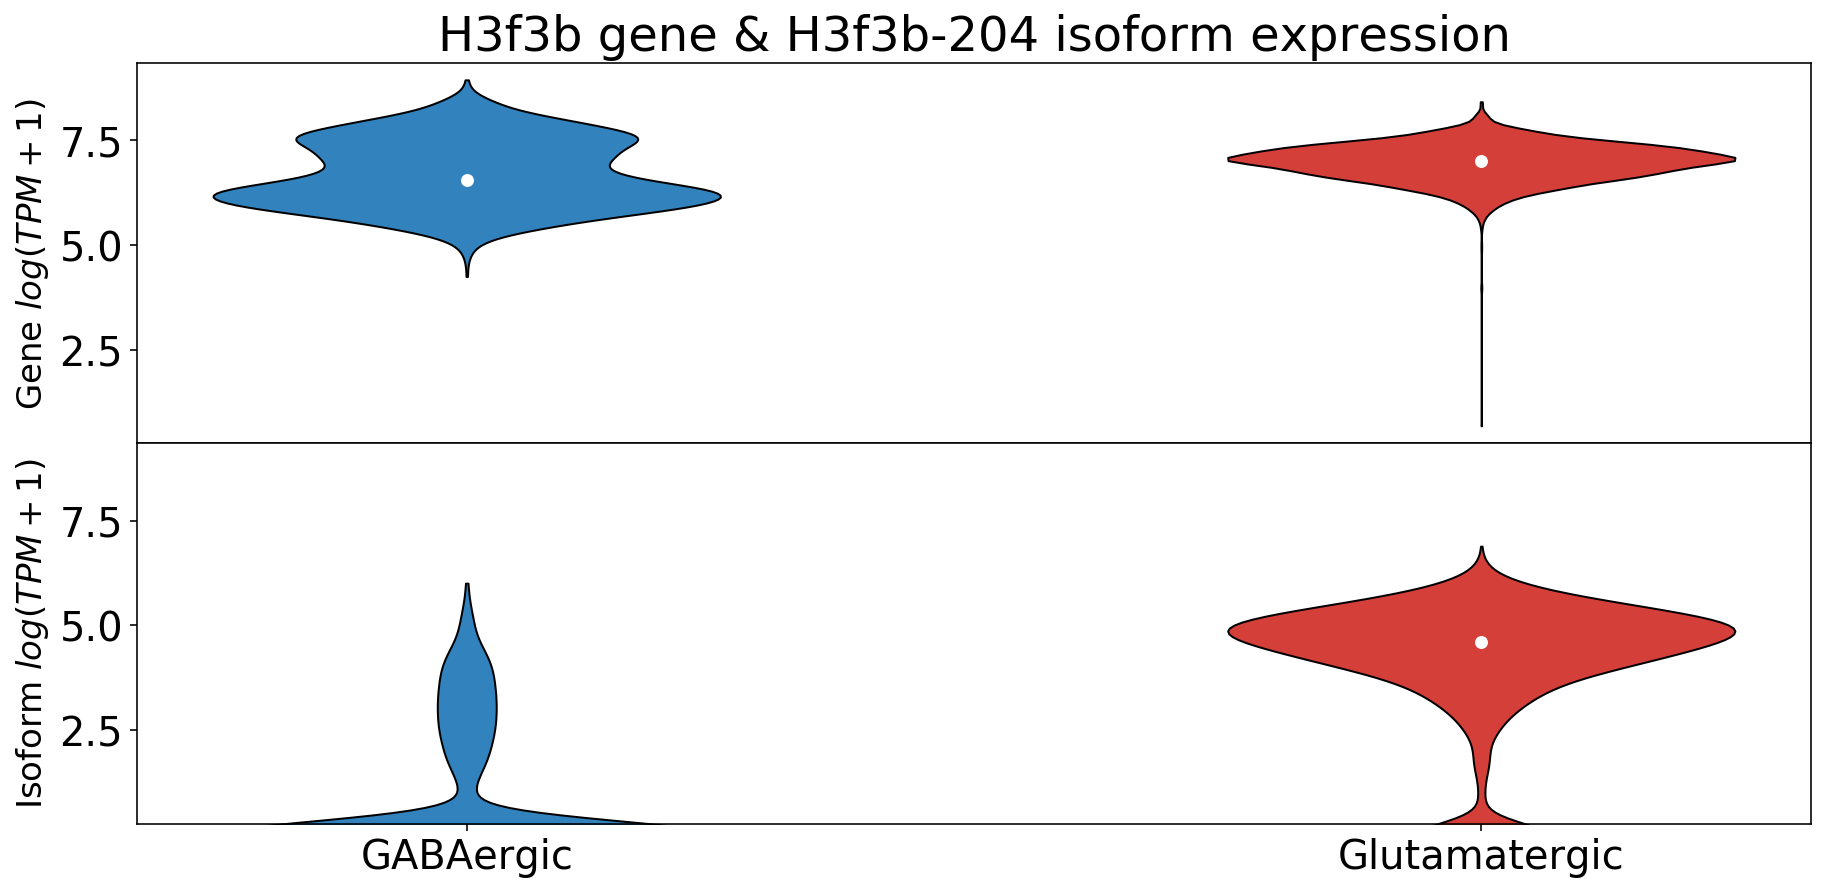

In [562]:
fig, ax = plt.subplots(figsize=(15,7), nrows=2, sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)

unique = np.unique(gene.obs.class_label)
unique = np.delete(unique, np.where(unique=="Low Quality"))
unique = np.delete(unique, np.where(unique=="Non-Neuronal"))
labels = unique
lidx = np.arange(1, len(labels)+1)  # the label locations
midx = np.where(unique==specific_cluster)[0][0]
#######3# Gene
x = []
for c in unique:
    x.append(np.asarray(gene[gene.obs.class_label==c][:,gene.var.gene_name==specific_gene].layers["log1p"]).reshape(-1).tolist())

parts = ax[0].violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor('#D43F3A')
    if pcidx == midx-1:
        pc.set_facecolor('#3182bd')

medians = [np.median(i) for i in x]
ax[0].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)

#ax[0].axhline(y=medians[midx], color="k")
ax[0].set_ylabel("Gene $log(TPM + 1)$", fontsize=17)
######## Isoform
x = []
for c in unique:
    x.append(np.asarray(isoform[isoform.obs.class_label==c][:,isoform.var.transcript_name==specific_isoform].layers["log1p"].todense()).reshape(-1).tolist())

parts = ax[1].violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor('#D43F3A')
    if pcidx == midx-1:
        pc.set_facecolor('#3182bd')


medians = [np.median(i) for i in x]
ax[1].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)
#ax[1].axhline(y=medians[midx], color="k")
ax[1].set_xticks(lidx)
ax[1].set_xticklabels(labels, rotation=0, ha="center")
ax[1].set_ylabel("Isoform $log(TPM + 1)$", fontsize=17)
ymin, ymax = ax[0].get_ylim()
ax[1].set_ylim((ymin, ymax))
ax[0].set_title("{} gene & {} isoform expression".format(specific_gene, specific_isoform))
plt.savefig("./level_1_fig/{}_glut_violin.png".format(specific_isoform),bbox_inches='tight', dpi=300)
plt.show()

# Figure 1 Merged

In [420]:
# Do this later

# Level 0, confirmation/Validation

- correlation between genes between smartseq and 10x and merfish
- for the markers from those markers, you can get more fine grain detailed
- supplementary, 3' end isoforms, can validate
- but you cannot always validate
- 10x and merfish and blind to these discoveries
- even at the highest level we can find differentail between glut and gaba
- we can do that for specific clusters
- how many genes list pvalue treshold after correction
- we check out 2 isoform genes, more reliable quantifications
- we find nice examples
- more over, focusing on those genes we verified, this binary isoform switching is an artifact (how much middle as a function of expression)
- not only can you find genes, and isoform shifts, we can chategorize the isoform shifts (more speculative, no validation)
- given that we believe these smartseq quantifications, we can tell them apart, give one or two examples
- ability to improve as annotations get more complete
- discussion
- this analysis revleas that the right way to think about these technologies is not as competitive but as complementary
- rare cell types (10x)
- assign cells to smartseq cells by 10x data
- then find isoform shifts to smartseq
- when you have the merfish you can know which isoforms it is expressing
- can localize where the gene is being expressed, and by virtue of the celltype expresses a specific isoform 
- triangulate the merfish to the smartseq
- motivation for 10x, spatial, smartseq
- cite the new smartseq paper better registration of celltypes with smartseq3
- in principle you could test some of these isoforms, method from rob bradly

- 10x, we see 3' end shift
- gene that 10x doesnt resolve, merfish doesnt resolve
- find gene, we know which cluster it is in, in merfish, we have a spatial resolved and we have identified the gene (specifically the individual isoform! that is localied
- this is how you use merfish (a figure that goes with this point, one of the spatial figures)

- Tac1 is in Pvalb

In [315]:
isoform[:,isoform.var.gene_name=="Rorb"].var

transcript_id             gene_id gene_name transcript_name  \
Rorb-201  ENSMUST00000040153  ENSMUSG00000036192      Rorb        Rorb-201   
Rorb-203  ENSMUST00000112832  ENSMUSG00000036192      Rorb        Rorb-203   
Rorb-202  ENSMUST00000112828  ENSMUSG00000036192      Rorb        Rorb-202   
Rorb-205  ENSMUST00000149635  ENSMUSG00000036192      Rorb        Rorb-205   
Rorb-204  ENSMUST00000147907  ENSMUSG00000036192      Rorb        Rorb-204   

               gene_TPM  highly_variable     means  dispersions  \
Rorb-201   68151.265625             True  2.501504     5.188683   
Rorb-203  199809.109375             True  3.520633     5.545575   
Rorb-202   35732.351562            False  1.917494     4.675618   
Rorb-205   12521.199219            False  1.101277     4.688912   
Rorb-204   13738.831055            False  1.181349     4.601297   

          dispersions_norm  
Rorb-201          1.517004  
Rorb-203          1.857764  
Rorb-202          1.007854  
Rorb-205          1.221753  
Rorb-204          1.113806

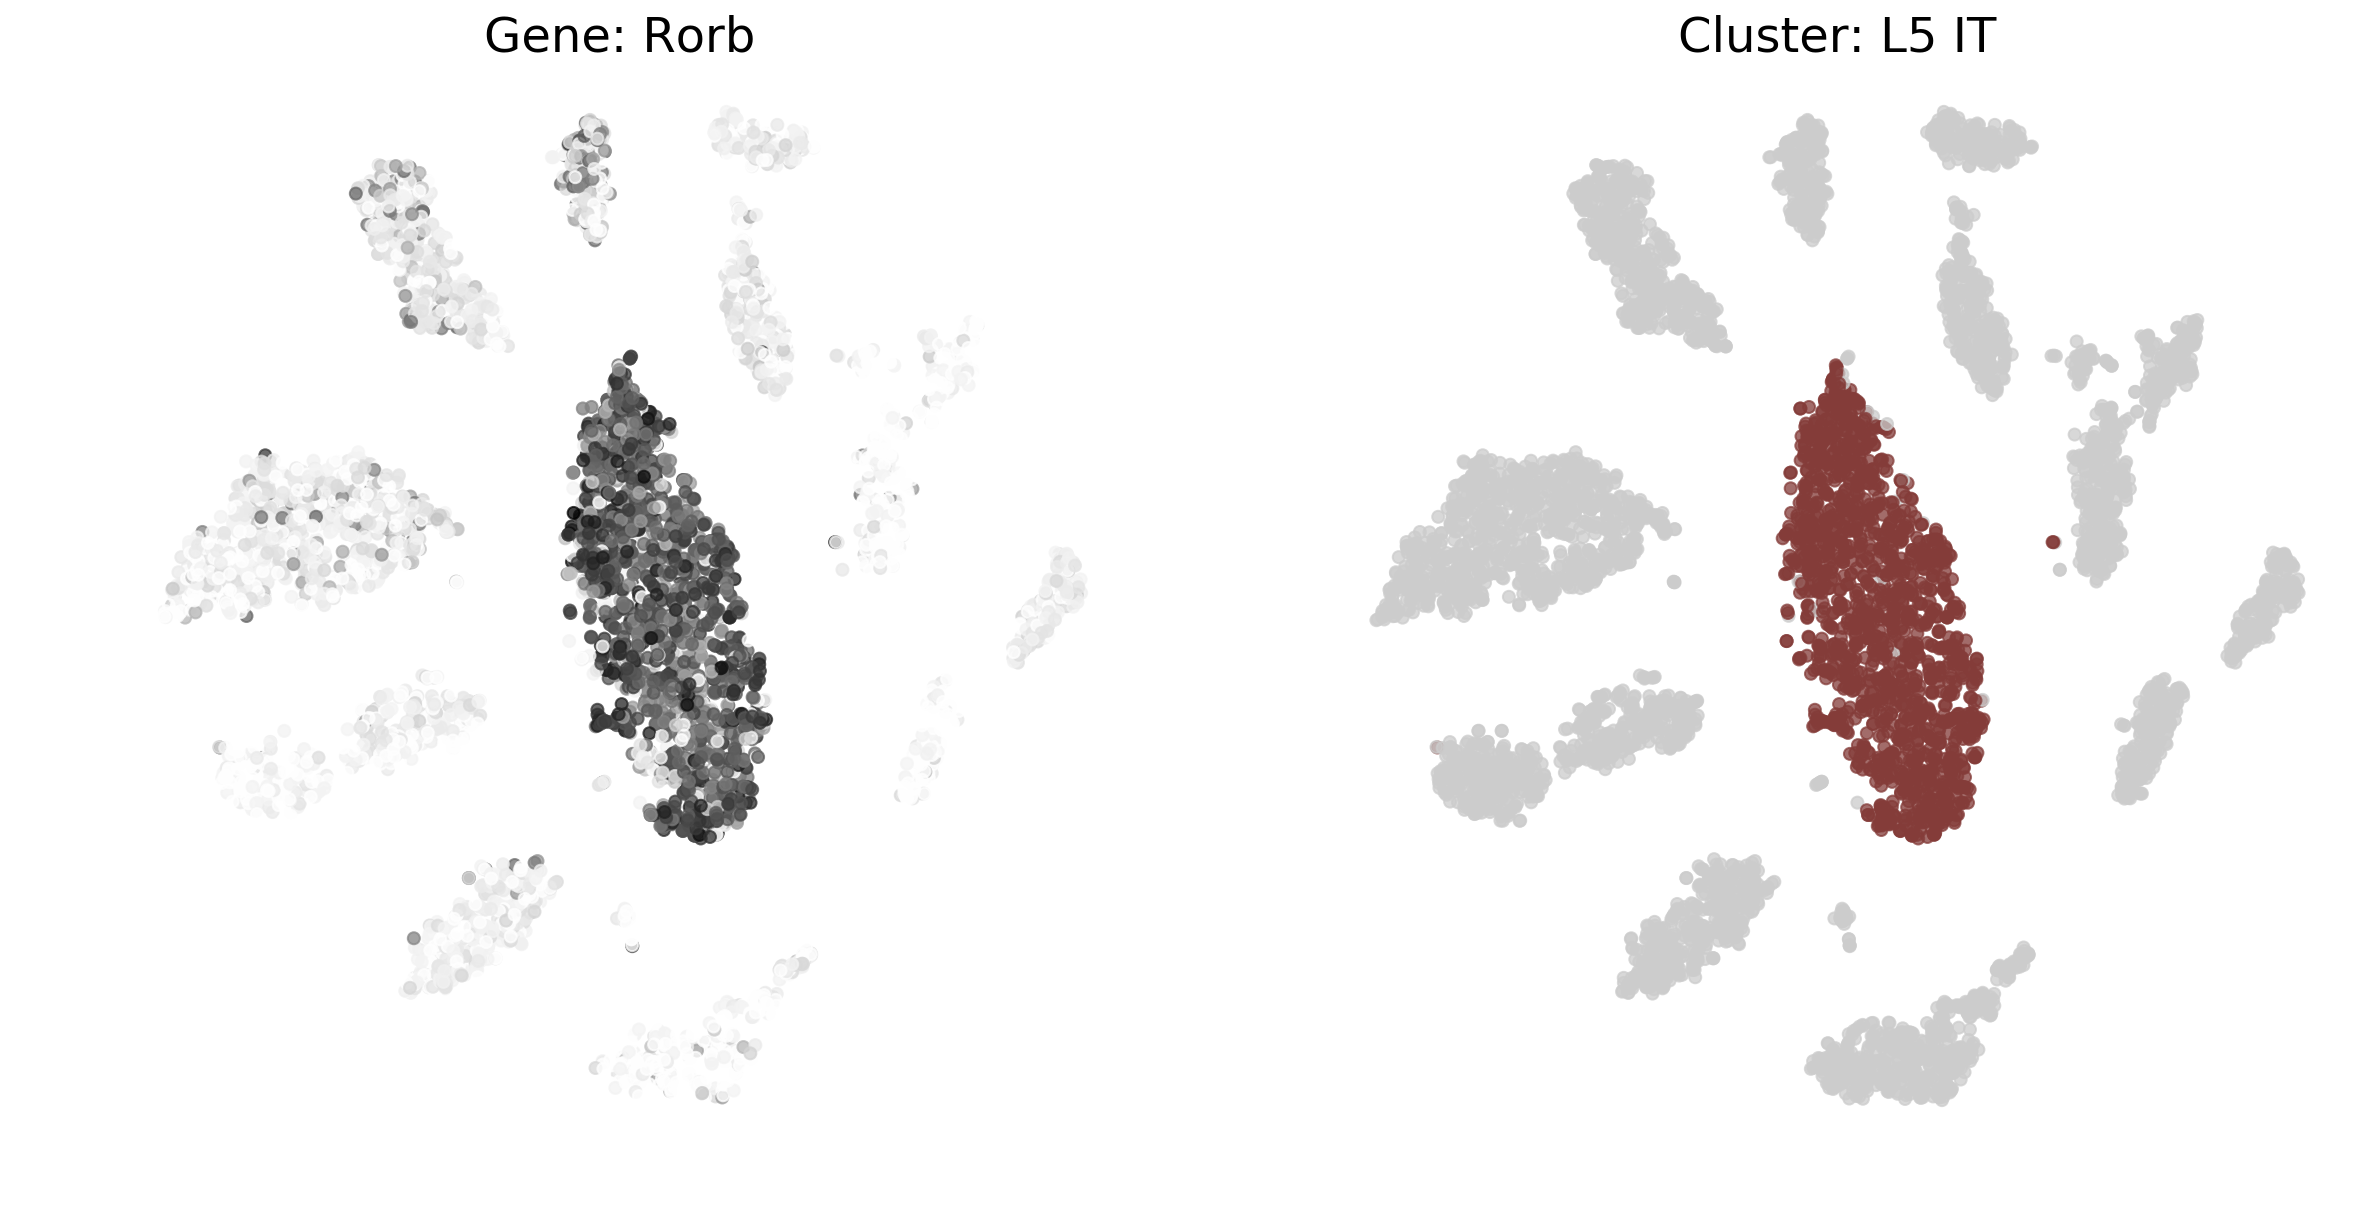

In [665]:
specific_gene = "Rorb"
#specific_gene = "Cnr1"
specific_cluster = "L5 IT"
#specific_cluster = "Vip"

complement_color = (0.8, 0.8, 0.8, 1.0)

fig, ax = plt.subplots(figsize=(20,10), ncols=2)

x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(gene[:, gene.var.gene_name==specific_gene].layers["log1p"]).reshape(-1)
cmap="Greys"
alpha = 0.75
ax[0].set_title("Gene: {}".format(specific_gene))

ax[0].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[0].set_axis_off()

x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]

c = gene.obs["subclass_label"].astype(str).map(cluster_cmap).tolist()
indices = np.where(gene.obs["subclass_label"]!=specific_cluster)[0]
replacements=[complement_color]*len(indices)
for (index, replacement) in zip(indices, replacements):
    c[index] = replacement
alpha=0.75
cmap="nipy_spectral_r"

ax[1].scatter(x, y, c=c, cmap=cmap, alpha=alpha)


ax[1].set_axis_off()
ax[1].set_title("Cluster: {}".format(specific_cluster))
plt.savefig("./level_1_fig/{}_validate_nca.png".format(specific_gene),bbox_inches='tight', dpi=300)

plt.show()

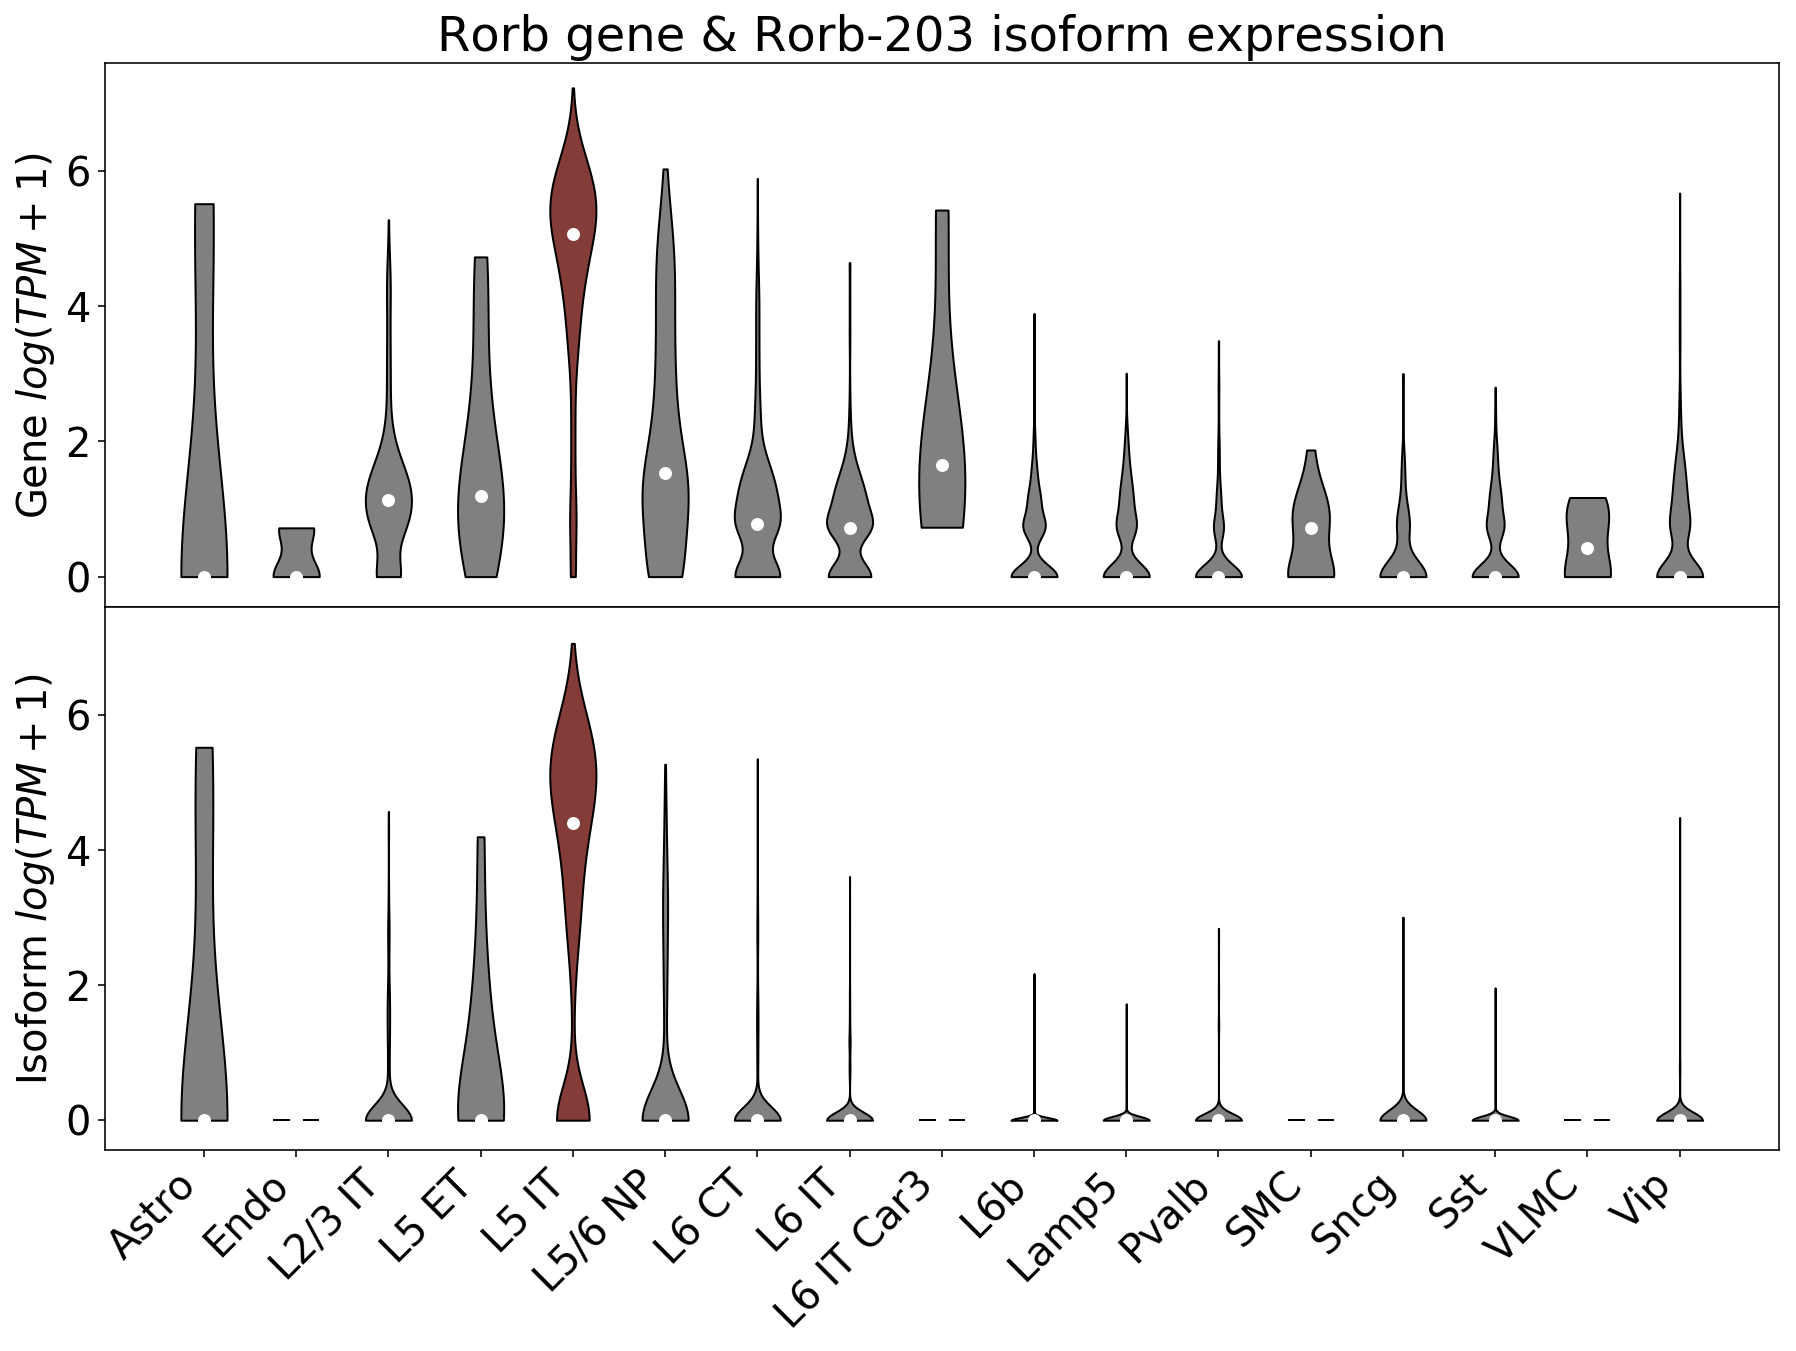

In [667]:
fig, ax = plt.subplots(figsize=(15,10), nrows=2, sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)
specific_isoform = specific_gene + "-203"
unique = np.unique(gene.obs.subclass_label)
unique = np.delete(unique, np.where(unique=="Low Quality"))
labels = unique
lidx = np.arange(1, len(labels)+1)  # the label locations
midx = np.where(unique==specific_cluster)[0][0]
#######3# Gene
x = []
for c in unique:
    x.append(np.asarray(gene[gene.obs.subclass_label==c][:,gene.var.gene_name==specific_gene].layers["log1p"]).reshape(-1).tolist())

parts = ax[0].violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor(cluster_cmap[specific_cluster])

medians = [np.median(i) for i in x]
ax[0].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)

#ax[0].axhline(y=medians[midx], color="k")
ax[0].set_ylabel("Gene $log(TPM + 1)$")
######## Isoform
x = []
for c in unique:
    x.append(np.asarray(isoform[isoform.obs.subclass_label==c][:,isoform.var.transcript_name==specific_isoform].layers["log1p"].todense()).reshape(-1).tolist())

parts = ax[1].violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor(cluster_cmap[specific_cluster])

medians = [np.median(i) for i in x]
ax[1].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)
#ax[1].axhline(y=medians[midx], color="k")
ax[1].set_xticks(lidx)
ax[1].set_xticklabels(labels, rotation=45, ha="right")
ax[1].set_ylabel("Isoform $log(TPM + 1)$")
ymin, ymax = ax[0].get_ylim()
ax[1].set_ylim((ymin, ymax))
ax[0].set_title("{} gene & {} isoform expression".format(specific_gene, specific_isoform))
plt.savefig("./level_1_fig/{}_validate_violin.png".format(specific_gene), bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
gene